In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(588, 100, 100)


In [17]:
print(y_test.shape)

(66, 100, 100)


In [18]:
print(x_train.shape)

(588, 15, 1)


In [19]:
print(x_test.shape)

(66, 15, 1)


In [20]:
theta_train.shape

(588,)

In [21]:
tsr_train.shape

(588,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((588, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((66, 2, 1))

In [28]:
tsr_theta_train.shape

(588, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
15/15 [==============================] - 1s 4ms/step - loss: 0.0203 - rmse: 0.1426
Epoch 2/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 3/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 4/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 5/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 6/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 7/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 9/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 10/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 11/10000
15/15 [=======

15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 85/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 86/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 87/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 88/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 89/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 90/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 91/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 92/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 93/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 94/10000
15/15 [=============

15/15 [==============================] - 0s 3ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 168/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 169/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 170/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 171/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 172/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 173/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 174/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 175/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 176/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 177/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0145 - rmse: 0.1204
Epoch 250/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 251/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0145 - rmse: 0.1203
Epoch 252/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 253/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 254/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 255/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 256/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 257/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 258/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 259/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 332/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 333/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.1108
Epoch 334/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 335/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1110
Epoch 336/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1105
Epoch 337/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 338/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 339/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 340/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1105
Epoch 341/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 414/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0101 - rmse: 0.1007
Epoch 415/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 416/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 417/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 418/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 419/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0997
Epoch 420/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0997
Epoch 421/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - rmse: 0.0996
Epoch 422/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 423/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 496/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0928
Epoch 497/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 498/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 499/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 500/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0086 - rmse: 0.0927
Epoch 501/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 502/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0940
Epoch 503/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0962
Epoch 504/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 505/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 578/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0851
Epoch 579/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 580/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 581/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0845
Epoch 582/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 583/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 584/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 585/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 586/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 587/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 660/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 661/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 662/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 663/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 664/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 665/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 666/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 667/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 668/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 669/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 742/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 743/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 744/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 745/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 746/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 747/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 748/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 749/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 750/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 751/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 824/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 825/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 826/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 827/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 828/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 829/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 830/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 831/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0652
Epoch 832/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0659
Epoch 833/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 906/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 907/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 908/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 909/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0604
Epoch 910/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 911/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 912/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 913/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 914/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 915/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 988/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 989/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 990/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 991/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 992/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 993/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 994/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 995/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 996/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 997/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 1070/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1071/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1072/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1073/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1074/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1075/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 1076/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 1077/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 1078/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1079/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 1152/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 1153/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 1154/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 1155/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 1156/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 1157/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 1158/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 1159/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 1160/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 1161/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 1234/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 1235/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 1236/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1237/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 1238/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 1239/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1240/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 1241/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 1242/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 1243/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 1316/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 1317/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 1318/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 1319/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 1320/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1321/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 1322/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 1323/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1324/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 1325/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 1398/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1399/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1400/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 1401/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 1402/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 1403/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 1404/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 1405/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 1406/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 1407/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 1480/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 1481/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1482/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 1483/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1484/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 1485/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 1486/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 1487/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 1488/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 1489/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 1562/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1563/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1564/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1565/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1566/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 1567/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1568/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1569/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 1570/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 1571/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1644/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 1645/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 1646/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 1647/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 1648/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 1649/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.9336e-04 - rmse: 0.0315
Epoch 1650/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.8375e-04 - rmse: 0.0314
Epoch 1651/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.9256e-04 - rmse: 0.0315
Epoch 1652/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0326
Epoch

15/15 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 1724/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 1725/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 1726/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.7469e-04 - rmse: 0.0312
Epoch 1727/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.4647e-04 - rmse: 0.0308
Epoch 1728/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.2388e-04 - rmse: 0.0304
Epoch 1729/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.0541e-04 - rmse: 0.0301
Epoch 1730/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.1159e-04 - rmse: 0.0302
Epoch 1731/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.1026e-04 - rmse: 0.0302
Epoch 1732/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9818e-04 - rm

15/15 [==============================] - 0s 3ms/step - loss: 8.9960e-04 - rmse: 0.0300
Epoch 1803/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4386e-04 - rmse: 0.0307
Epoch 1804/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9522e-04 - rmse: 0.0299
Epoch 1805/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7227e-04 - rmse: 0.0278
Epoch 1806/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6481e-04 - rmse: 0.0277
Epoch 1807/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.6395e-04 - rmse: 0.0276
Epoch 1808/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2070e-04 - rmse: 0.0286
Epoch 1809/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2166e-04 - rmse: 0.0287
Epoch 1810/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.7203e-04 - rmse: 0.0278
Epoch 1811/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6

15/15 [==============================] - 0s 4ms/step - loss: 7.5071e-04 - rmse: 0.0274
Epoch 1881/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.8230e-04 - rmse: 0.0280
Epoch 1882/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.0628e-04 - rmse: 0.0266
Epoch 1883/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.7187e-04 - rmse: 0.0259
Epoch 1884/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7276e-04 - rmse: 0.0278
Epoch 1885/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.8459e-04 - rmse: 0.0280
Epoch 1886/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.5583e-04 - rmse: 0.0275
Epoch 1887/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7115e-04 - rmse: 0.0278
Epoch 1888/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.9098e-04 - rmse: 0.0263
Epoch 1889/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8

15/15 [==============================] - 0s 4ms/step - loss: 7.0882e-04 - rmse: 0.0266
Epoch 1959/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.6124e-04 - rmse: 0.0276
Epoch 1960/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.2775e-04 - rmse: 0.0270
Epoch 1961/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.5649e-04 - rmse: 0.0275
Epoch 1962/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.9411e-04 - rmse: 0.0263
Epoch 1963/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.3906e-04 - rmse: 0.0253
Epoch 1964/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4867e-04 - rmse: 0.0255
Epoch 1965/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.9667e-04 - rmse: 0.0264
Epoch 1966/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.1408e-04 - rmse: 0.0267
Epoch 1967/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4

15/15 [==============================] - 0s 4ms/step - loss: 5.9950e-04 - rmse: 0.0245
Epoch 2037/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.3174e-04 - rmse: 0.0251
Epoch 2038/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.0899e-04 - rmse: 0.0247
Epoch 2039/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.6574e-04 - rmse: 0.0258
Epoch 2040/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.8889e-04 - rmse: 0.0262
Epoch 2041/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.4694e-04 - rmse: 0.0254
Epoch 2042/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.9473e-04 - rmse: 0.0244
Epoch 2043/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.0927e-04 - rmse: 0.0247
Epoch 2044/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.7182e-04 - rmse: 0.0239
Epoch 2045/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.5

15/15 [==============================] - 0s 3ms/step - loss: 5.9688e-04 - rmse: 0.0244
Epoch 2115/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.9214e-04 - rmse: 0.0243
Epoch 2116/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.7922e-04 - rmse: 0.0241
Epoch 2117/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.1154e-04 - rmse: 0.0226
Epoch 2118/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9079e-04 - rmse: 0.0222
Epoch 2119/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9424e-04 - rmse: 0.0222
Epoch 2120/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.7104e-04 - rmse: 0.0217
Epoch 2121/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.8361e-04 - rmse: 0.0220
Epoch 2122/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.8850e-04 - rmse: 0.0221
Epoch 2123/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.5

15/15 [==============================] - 0s 3ms/step - loss: 5.5475e-04 - rmse: 0.0236
Epoch 2193/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0478e-04 - rmse: 0.0225
Epoch 2194/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.8861e-04 - rmse: 0.0221
Epoch 2195/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.8838e-04 - rmse: 0.0221
Epoch 2196/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9651e-04 - rmse: 0.0223
Epoch 2197/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0830e-04 - rmse: 0.0225
Epoch 2198/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9455e-04 - rmse: 0.0222
Epoch 2199/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.3648e-04 - rmse: 0.0232
Epoch 2200/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9752e-04 - rmse: 0.0223
Epoch 2201/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.7

15/15 [==============================] - 0s 4ms/step - loss: 5.9611e-04 - rmse: 0.0244
Epoch 2271/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.1884e-04 - rmse: 0.0249
Epoch 2272/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.8710e-04 - rmse: 0.0242
Epoch 2273/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.4034e-04 - rmse: 0.0232
Epoch 2274/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9209e-04 - rmse: 0.0222
Epoch 2275/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.4705e-04 - rmse: 0.0211
Epoch 2276/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.4161e-04 - rmse: 0.0210
Epoch 2277/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3378e-04 - rmse: 0.0208
Epoch 2278/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0022e-04 - rmse: 0.0224
Epoch 2279/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.0

15/15 [==============================] - 0s 3ms/step - loss: 4.4901e-04 - rmse: 0.0212
Epoch 2349/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.1030e-04 - rmse: 0.0203
Epoch 2350/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5004e-04 - rmse: 0.0212
Epoch 2351/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.0330e-04 - rmse: 0.0201
Epoch 2352/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.1716e-04 - rmse: 0.0204
Epoch 2353/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.0301e-04 - rmse: 0.0201
Epoch 2354/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8619e-04 - rmse: 0.0197
Epoch 2355/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8515e-04 - rmse: 0.0196
Epoch 2356/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.1334e-04 - rmse: 0.0203
Epoch 2357/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.4

15/15 [==============================] - 0s 3ms/step - loss: 5.3516e-04 - rmse: 0.0231
Epoch 2427/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5628e-04 - rmse: 0.0214
Epoch 2428/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.6392e-04 - rmse: 0.0215
Epoch 2429/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.6125e-04 - rmse: 0.0215
Epoch 2430/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8868e-04 - rmse: 0.0197
Epoch 2431/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9932e-04 - rmse: 0.0200
Epoch 2432/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0871e-04 - rmse: 0.0226
Epoch 2433/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.1988e-04 - rmse: 0.0228
Epoch 2434/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.5202e-04 - rmse: 0.0213
Epoch 2435/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9

15/15 [==============================] - 0s 4ms/step - loss: 4.1607e-04 - rmse: 0.0204
Epoch 2505/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.5431e-04 - rmse: 0.0188
Epoch 2506/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.2773e-04 - rmse: 0.0181
Epoch 2507/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.6036e-04 - rmse: 0.0190
Epoch 2508/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.8369e-04 - rmse: 0.0196
Epoch 2509/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.8487e-04 - rmse: 0.0196
Epoch 2510/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.7853e-04 - rmse: 0.0195
Epoch 2511/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3139e-04 - rmse: 0.0182
Epoch 2512/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.0622e-04 - rmse: 0.0175
Epoch 2513/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.1

15/15 [==============================] - 0s 4ms/step - loss: 4.4477e-04 - rmse: 0.0211
Epoch 2583/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.8578e-04 - rmse: 0.0220
Epoch 2584/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.4965e-04 - rmse: 0.0212
Epoch 2585/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.7365e-04 - rmse: 0.0193
Epoch 2586/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.8680e-04 - rmse: 0.0197
Epoch 2587/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.3734e-04 - rmse: 0.0209
Epoch 2588/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.7378e-04 - rmse: 0.0193
Epoch 2589/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.5276e-04 - rmse: 0.0188
Epoch 2590/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.4512e-04 - rmse: 0.0186
Epoch 2591/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.4

15/15 [==============================] - 0s 3ms/step - loss: 3.4939e-04 - rmse: 0.0187
Epoch 2661/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.2895e-04 - rmse: 0.0181
Epoch 2662/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.4656e-04 - rmse: 0.0186
Epoch 2663/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3464e-04 - rmse: 0.0183
Epoch 2664/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.5881e-04 - rmse: 0.0189
Epoch 2665/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3343e-04 - rmse: 0.0183
Epoch 2666/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9436e-04 - rmse: 0.0172
Epoch 2667/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9180e-04 - rmse: 0.0171
Epoch 2668/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.7185e-04 - rmse: 0.0165
Epoch 2669/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.7

15/15 [==============================] - 0s 4ms/step - loss: 4.0617e-04 - rmse: 0.0202
Epoch 2739/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3667e-04 - rmse: 0.0183
Epoch 2740/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.7260e-04 - rmse: 0.0165
Epoch 2741/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.5245e-04 - rmse: 0.0159
Epoch 2742/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.6137e-04 - rmse: 0.0162
Epoch 2743/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.5591e-04 - rmse: 0.0160
Epoch 2744/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4789e-04 - rmse: 0.0157
Epoch 2745/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4417e-04 - rmse: 0.0156
Epoch 2746/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4581e-04 - rmse: 0.0157
Epoch 2747/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4

15/15 [==============================] - 0s 4ms/step - loss: 2.8558e-04 - rmse: 0.0169
Epoch 2817/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8494e-04 - rmse: 0.0169
Epoch 2818/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.1072e-04 - rmse: 0.0176
Epoch 2819/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.9290e-04 - rmse: 0.0171
Epoch 2820/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.8515e-04 - rmse: 0.0169
Epoch 2821/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.0065e-04 - rmse: 0.0173
Epoch 2822/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.0818e-04 - rmse: 0.0176
Epoch 2823/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.0991e-04 - rmse: 0.0176
Epoch 2824/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.7902e-04 - rmse: 0.0167
Epoch 2825/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9

15/15 [==============================] - 0s 3ms/step - loss: 3.3861e-04 - rmse: 0.0184
Epoch 2895/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.8039e-04 - rmse: 0.0167
Epoch 2896/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.6015e-04 - rmse: 0.0161
Epoch 2897/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.2746e-04 - rmse: 0.0181
Epoch 2898/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3981e-04 - rmse: 0.0184
Epoch 2899/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8814e-04 - rmse: 0.0170
Epoch 2900/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.3294e-04 - rmse: 0.0153
Epoch 2901/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.3073e-04 - rmse: 0.0152
Epoch 2902/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.6127e-04 - rmse: 0.0162
Epoch 2903/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4

15/15 [==============================] - 0s 3ms/step - loss: 2.6006e-04 - rmse: 0.0161
Epoch 2973/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.6395e-04 - rmse: 0.0162
Epoch 2974/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9471e-04 - rmse: 0.0172
Epoch 2975/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.4745e-04 - rmse: 0.0186
Epoch 2976/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.9971e-04 - rmse: 0.0173
Epoch 2977/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.6639e-04 - rmse: 0.0163
Epoch 2978/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.3273e-04 - rmse: 0.0153
Epoch 2979/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.5447e-04 - rmse: 0.0160
Epoch 2980/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4800e-04 - rmse: 0.0157
Epoch 2981/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4

15/15 [==============================] - 0s 4ms/step - loss: 2.4969e-04 - rmse: 0.0158
Epoch 3051/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4584e-04 - rmse: 0.0157
Epoch 3052/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.2177e-04 - rmse: 0.0149
Epoch 3053/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.1609e-04 - rmse: 0.0147
Epoch 3054/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1977e-04 - rmse: 0.0148
Epoch 3055/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1032e-04 - rmse: 0.0145
Epoch 3056/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9661e-04 - rmse: 0.0140
Epoch 3057/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0235e-04 - rmse: 0.0142
Epoch 3058/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2037e-04 - rmse: 0.0148
Epoch 3059/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3

15/15 [==============================] - 0s 3ms/step - loss: 3.2572e-04 - rmse: 0.0180
Epoch 3129/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3352e-04 - rmse: 0.0183
Epoch 3130/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.4598e-04 - rmse: 0.0211
Epoch 3131/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5483e-04 - rmse: 0.0213
Epoch 3132/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.4230e-04 - rmse: 0.0233
Epoch 3133/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.6034e-04 - rmse: 0.0190
Epoch 3134/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.7384e-04 - rmse: 0.0165
Epoch 3135/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.3499e-04 - rmse: 0.0153
Epoch 3136/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5239e-04 - rmse: 0.0159
Epoch 3137/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6

15/15 [==============================] - 0s 4ms/step - loss: 3.0497e-04 - rmse: 0.0175
Epoch 3207/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.8998e-04 - rmse: 0.0170
Epoch 3208/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.5637e-04 - rmse: 0.0160
Epoch 3209/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.2542e-04 - rmse: 0.0150
Epoch 3210/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1181e-04 - rmse: 0.0146
Epoch 3211/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0768e-04 - rmse: 0.0144
Epoch 3212/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0703e-04 - rmse: 0.0144
Epoch 3213/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0302e-04 - rmse: 0.0142
Epoch 3214/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8172e-04 - rmse: 0.0135
Epoch 3215/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.8

15/15 [==============================] - 0s 3ms/step - loss: 3.1288e-04 - rmse: 0.0177
Epoch 3285/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8482e-04 - rmse: 0.0169
Epoch 3286/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9922e-04 - rmse: 0.0141
Epoch 3287/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.0156e-04 - rmse: 0.0142
Epoch 3288/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7981e-04 - rmse: 0.0134
Epoch 3289/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7552e-04 - rmse: 0.0132
Epoch 3290/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.9092e-04 - rmse: 0.0138
Epoch 3291/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.9980e-04 - rmse: 0.0141
Epoch 3292/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7957e-04 - rmse: 0.0134
Epoch 3293/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.8371e-04 - rmse: 0.0136
Epoch 3363/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8849e-04 - rmse: 0.0137
Epoch 3364/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1635e-04 - rmse: 0.0147
Epoch 3365/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.6701e-04 - rmse: 0.0163
Epoch 3366/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.6362e-04 - rmse: 0.0191
Epoch 3367/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.7859e-04 - rmse: 0.0195
Epoch 3368/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9056e-04 - rmse: 0.0170
Epoch 3369/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.5053e-04 - rmse: 0.0158
Epoch 3370/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.2197e-04 - rmse: 0.0149
Epoch 3371/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9

15/15 [==============================] - 0s 5ms/step - loss: 1.7098e-04 - rmse: 0.0131
Epoch 3441/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9270e-04 - rmse: 0.0139
Epoch 3442/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7830e-04 - rmse: 0.0134
Epoch 3443/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.7579e-04 - rmse: 0.0133
Epoch 3444/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6851e-04 - rmse: 0.0130
Epoch 3445/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6074e-04 - rmse: 0.0127
Epoch 3446/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6404e-04 - rmse: 0.0128
Epoch 3447/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.8826e-04 - rmse: 0.0137
Epoch 3448/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.2434e-04 - rmse: 0.0150
Epoch 3449/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.0

15/15 [==============================] - 0s 5ms/step - loss: 2.1260e-04 - rmse: 0.0146
Epoch 3519/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1197e-04 - rmse: 0.0146
Epoch 3520/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9074e-04 - rmse: 0.0138
Epoch 3521/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8601e-04 - rmse: 0.0136
Epoch 3522/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8223e-04 - rmse: 0.0135
Epoch 3523/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9468e-04 - rmse: 0.0140
Epoch 3524/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.2615e-04 - rmse: 0.0150
Epoch 3525/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.3271e-04 - rmse: 0.0153
Epoch 3526/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.5989e-04 - rmse: 0.0190
Epoch 3527/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.1

15/15 [==============================] - 0s 3ms/step - loss: 1.5217e-04 - rmse: 0.0123
Epoch 3597/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.7757e-04 - rmse: 0.0133
Epoch 3598/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7015e-04 - rmse: 0.0130
Epoch 3599/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5895e-04 - rmse: 0.0126
Epoch 3600/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4323e-04 - rmse: 0.0120
Epoch 3601/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4267e-04 - rmse: 0.0119
Epoch 3602/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4939e-04 - rmse: 0.0122
Epoch 3603/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4617e-04 - rmse: 0.0121
Epoch 3604/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4412e-04 - rmse: 0.0120
Epoch 3605/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.7

15/15 [==============================] - 0s 3ms/step - loss: 1.4854e-04 - rmse: 0.0122
Epoch 3675/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4097e-04 - rmse: 0.0119
Epoch 3676/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2763e-04 - rmse: 0.0113
Epoch 3677/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3410e-04 - rmse: 0.0116
Epoch 3678/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2838e-04 - rmse: 0.0113
Epoch 3679/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3431e-04 - rmse: 0.0116
Epoch 3680/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.6688e-04 - rmse: 0.0129
Epoch 3681/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.8596e-04 - rmse: 0.0136
Epoch 3682/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.1125e-04 - rmse: 0.0145
Epoch 3683/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9

15/15 [==============================] - 0s 3ms/step - loss: 3.6850e-04 - rmse: 0.0192
Epoch 3753/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3408e-04 - rmse: 0.0183
Epoch 3754/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.2482e-04 - rmse: 0.0180
Epoch 3755/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.6933e-04 - rmse: 0.0192
Epoch 3756/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.1293e-04 - rmse: 0.0203
Epoch 3757/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3705e-04 - rmse: 0.0184
Epoch 3758/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.7037e-04 - rmse: 0.0164
Epoch 3759/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.5944e-04 - rmse: 0.0161
Epoch 3760/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.1036e-04 - rmse: 0.0145
Epoch 3761/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7

15/15 [==============================] - 0s 3ms/step - loss: 2.5761e-04 - rmse: 0.0161
Epoch 3831/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.4437e-04 - rmse: 0.0156
Epoch 3832/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.4298e-04 - rmse: 0.0156
Epoch 3833/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.3957e-04 - rmse: 0.0155
Epoch 3834/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1337e-04 - rmse: 0.0146
Epoch 3835/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.8832e-04 - rmse: 0.0137
Epoch 3836/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.7008e-04 - rmse: 0.0130
Epoch 3837/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5140e-04 - rmse: 0.0123
Epoch 3838/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5834e-04 - rmse: 0.0126
Epoch 3839/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4

15/15 [==============================] - 0s 4ms/step - loss: 2.4935e-04 - rmse: 0.0158
Epoch 3909/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.6544e-04 - rmse: 0.0163
Epoch 3910/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.5171e-04 - rmse: 0.0235
Epoch 3911/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.1983e-04 - rmse: 0.0228
Epoch 3912/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.8239e-04 - rmse: 0.0220
Epoch 3913/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.6775e-04 - rmse: 0.0216
Epoch 3914/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3284e-04 - rmse: 0.0182
Epoch 3915/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.7411e-04 - rmse: 0.0166
Epoch 3916/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9975e-04 - rmse: 0.0141
Epoch 3917/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6

15/15 [==============================] - 0s 4ms/step - loss: 1.4592e-04 - rmse: 0.0121
Epoch 3987/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4892e-04 - rmse: 0.0122
Epoch 3988/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4916e-04 - rmse: 0.0122
Epoch 3989/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6774e-04 - rmse: 0.0130
Epoch 3990/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1004e-04 - rmse: 0.0145
Epoch 3991/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8595e-04 - rmse: 0.0136
Epoch 3992/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7629e-04 - rmse: 0.0133
Epoch 3993/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1543e-04 - rmse: 0.0147
Epoch 3994/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1546e-04 - rmse: 0.0147
Epoch 3995/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6

15/15 [==============================] - 0s 3ms/step - loss: 1.3675e-04 - rmse: 0.0117
Epoch 4065/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3315e-04 - rmse: 0.0115
Epoch 4066/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2978e-04 - rmse: 0.0114
Epoch 4067/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4821e-04 - rmse: 0.0122
Epoch 4068/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2818e-04 - rmse: 0.0113
Epoch 4069/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2152e-04 - rmse: 0.0110
Epoch 4070/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2428e-04 - rmse: 0.0111
Epoch 4071/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1774e-04 - rmse: 0.0109
Epoch 4072/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0878e-04 - rmse: 0.0104
Epoch 4073/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0

15/15 [==============================] - 0s 3ms/step - loss: 3.3230e-04 - rmse: 0.0182
Epoch 4143/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.7620e-04 - rmse: 0.0166
Epoch 4144/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.3451e-04 - rmse: 0.0153
Epoch 4145/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.1361e-04 - rmse: 0.0146
Epoch 4146/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.8202e-04 - rmse: 0.0135
Epoch 4147/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8399e-04 - rmse: 0.0136
Epoch 4148/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.9964e-04 - rmse: 0.0141
Epoch 4149/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5325e-04 - rmse: 0.0124
Epoch 4150/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3355e-04 - rmse: 0.0116
Epoch 4151/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1

15/15 [==============================] - 0s 4ms/step - loss: 2.6453e-04 - rmse: 0.0163
Epoch 4221/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.4182e-04 - rmse: 0.0156
Epoch 4222/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7751e-04 - rmse: 0.0133
Epoch 4223/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5563e-04 - rmse: 0.0125
Epoch 4224/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2323e-04 - rmse: 0.0111
Epoch 4225/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0969e-04 - rmse: 0.0105
Epoch 4226/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3337e-04 - rmse: 0.0115
Epoch 4227/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2576e-04 - rmse: 0.0112
Epoch 4228/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2895e-04 - rmse: 0.0114
Epoch 4229/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1

15/15 [==============================] - 0s 3ms/step - loss: 1.5177e-04 - rmse: 0.0123
Epoch 4299/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5972e-04 - rmse: 0.0126
Epoch 4300/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3694e-04 - rmse: 0.0117
Epoch 4301/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2505e-04 - rmse: 0.0112
Epoch 4302/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3841e-04 - rmse: 0.0118
Epoch 4303/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3849e-04 - rmse: 0.0118
Epoch 4304/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3831e-04 - rmse: 0.0118
Epoch 4305/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4644e-04 - rmse: 0.0121
Epoch 4306/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.6529e-04 - rmse: 0.0129
Epoch 4307/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6

15/15 [==============================] - 0s 4ms/step - loss: 2.6980e-04 - rmse: 0.0164
Epoch 4377/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.0653e-04 - rmse: 0.0144
Epoch 4378/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6038e-04 - rmse: 0.0127
Epoch 4379/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4277e-04 - rmse: 0.0119
Epoch 4380/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2799e-04 - rmse: 0.0113
Epoch 4381/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0461e-04 - rmse: 0.0102
Epoch 4382/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0977e-04 - rmse: 0.0105
Epoch 4383/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0437e-04 - rmse: 0.0102
Epoch 4384/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1286e-04 - rmse: 0.0106
Epoch 4385/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0

15/15 [==============================] - 0s 4ms/step - loss: 1.0805e-04 - rmse: 0.0104
Epoch 4455/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1636e-04 - rmse: 0.0108
Epoch 4456/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2545e-04 - rmse: 0.0112
Epoch 4457/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3282e-04 - rmse: 0.0115
Epoch 4458/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4374e-04 - rmse: 0.0120
Epoch 4459/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1816e-04 - rmse: 0.0109
Epoch 4460/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1784e-04 - rmse: 0.0109
Epoch 4461/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1706e-04 - rmse: 0.0108
Epoch 4462/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1323e-04 - rmse: 0.0106
Epoch 4463/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1

15/15 [==============================] - 0s 3ms/step - loss: 1.0314e-04 - rmse: 0.0102
Epoch 4533/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1381e-04 - rmse: 0.0107
Epoch 4534/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1179e-04 - rmse: 0.0106
Epoch 4535/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4365e-05 - rmse: 0.0097
Epoch 4536/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.2058e-05 - rmse: 0.0096
Epoch 4537/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.7807e-05 - rmse: 0.0099
Epoch 4538/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.9549e-05 - rmse: 0.0100
Epoch 4539/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.8361e-05 - rmse: 0.0099
Epoch 4540/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.0114e-05 - rmse: 0.0095
Epoch 4541/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.2

15/15 [==============================] - 0s 4ms/step - loss: 2.2265e-04 - rmse: 0.0149
Epoch 4611/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.2677e-04 - rmse: 0.0151
Epoch 4612/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.9652e-04 - rmse: 0.0140
Epoch 4613/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5953e-04 - rmse: 0.0126
Epoch 4614/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2706e-04 - rmse: 0.0113
Epoch 4615/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0736e-04 - rmse: 0.0104
Epoch 4616/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1281e-04 - rmse: 0.0106
Epoch 4617/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1726e-04 - rmse: 0.0108
Epoch 4618/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0236e-04 - rmse: 0.0101
Epoch 4619/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0

15/15 [==============================] - 0s 4ms/step - loss: 8.8758e-05 - rmse: 0.0094
Epoch 4689/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.6754e-05 - rmse: 0.0098
Epoch 4690/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5834e-05 - rmse: 0.0093
Epoch 4691/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.6647e-05 - rmse: 0.0098
Epoch 4692/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0390e-04 - rmse: 0.0102
Epoch 4693/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0033e-04 - rmse: 0.0100
Epoch 4694/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1633e-04 - rmse: 0.0108
Epoch 4695/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0378e-04 - rmse: 0.0102
Epoch 4696/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.5132e-05 - rmse: 0.0098
Epoch 4697/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4

15/15 [==============================] - 0s 4ms/step - loss: 8.4752e-05 - rmse: 0.0092
Epoch 4767/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0180e-04 - rmse: 0.0101
Epoch 4768/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4459e-04 - rmse: 0.0120
Epoch 4769/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2060e-04 - rmse: 0.0110
Epoch 4770/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2116e-04 - rmse: 0.0110
Epoch 4771/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0759e-04 - rmse: 0.0104
Epoch 4772/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.8833e-05 - rmse: 0.0099
Epoch 4773/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.5134e-05 - rmse: 0.0098
Epoch 4774/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.8489e-05 - rmse: 0.0094
Epoch 4775/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.9

15/15 [==============================] - 0s 4ms/step - loss: 1.3690e-04 - rmse: 0.0117
Epoch 4845/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3398e-04 - rmse: 0.0116
Epoch 4846/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2310e-04 - rmse: 0.0111
Epoch 4847/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2304e-04 - rmse: 0.0111
Epoch 4848/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4028e-04 - rmse: 0.0118
Epoch 4849/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5342e-04 - rmse: 0.0124
Epoch 4850/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3989e-04 - rmse: 0.0118
Epoch 4851/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4782e-04 - rmse: 0.0122
Epoch 4852/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1263e-04 - rmse: 0.0106
Epoch 4853/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0

15/15 [==============================] - 0s 3ms/step - loss: 1.2316e-04 - rmse: 0.0111
Epoch 4923/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3707e-04 - rmse: 0.0117
Epoch 4924/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1623e-04 - rmse: 0.0108
Epoch 4925/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.7837e-05 - rmse: 0.0099
Epoch 4926/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.5039e-05 - rmse: 0.0097
Epoch 4927/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.6352e-05 - rmse: 0.0093
Epoch 4928/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9044e-05 - rmse: 0.0094
Epoch 4929/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0261e-04 - rmse: 0.0101
Epoch 4930/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1894e-04 - rmse: 0.0109
Epoch 4931/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2

15/15 [==============================] - 0s 3ms/step - loss: 2.1383e-04 - rmse: 0.0146
Epoch 5001/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.0157e-04 - rmse: 0.0142
Epoch 5002/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7780e-04 - rmse: 0.0133
Epoch 5003/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.7397e-04 - rmse: 0.0132
Epoch 5004/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2890e-04 - rmse: 0.0114
Epoch 5005/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.1379e-05 - rmse: 0.0096
Epoch 5006/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6643e-05 - rmse: 0.0088
Epoch 5007/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.1044e-05 - rmse: 0.0090
Epoch 5008/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.9943e-05 - rmse: 0.0095
Epoch 5009/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7

15/15 [==============================] - 0s 3ms/step - loss: 9.3455e-05 - rmse: 0.0097
Epoch 5079/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0454e-04 - rmse: 0.0102
Epoch 5080/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1311e-04 - rmse: 0.0106
Epoch 5081/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1659e-04 - rmse: 0.0108
Epoch 5082/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4164e-04 - rmse: 0.0119
Epoch 5083/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2398e-04 - rmse: 0.0111
Epoch 5084/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2697e-04 - rmse: 0.0113
Epoch 5085/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8175e-04 - rmse: 0.0135
Epoch 5086/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9948e-04 - rmse: 0.0141
Epoch 5087/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.2

15/15 [==============================] - 0s 4ms/step - loss: 1.0928e-04 - rmse: 0.0105
Epoch 5157/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.9982e-05 - rmse: 0.0089
Epoch 5158/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.9617e-05 - rmse: 0.0089
Epoch 5159/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.9076e-05 - rmse: 0.0100
Epoch 5160/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0260e-04 - rmse: 0.0101
Epoch 5161/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.9609e-05 - rmse: 0.0100
Epoch 5162/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0236e-04 - rmse: 0.0101
Epoch 5163/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.5721e-05 - rmse: 0.0098
Epoch 5164/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4798e-05 - rmse: 0.0086
Epoch 5165/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7

15/15 [==============================] - 0s 3ms/step - loss: 9.6183e-05 - rmse: 0.0098
Epoch 5235/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.3324e-05 - rmse: 0.0097
Epoch 5236/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.6893e-05 - rmse: 0.0093
Epoch 5237/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.1250e-05 - rmse: 0.0090
Epoch 5238/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2737e-05 - rmse: 0.0091
Epoch 5239/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.1736e-05 - rmse: 0.0085
Epoch 5240/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.6251e-05 - rmse: 0.0093
Epoch 5241/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.0810e-05 - rmse: 0.0095
Epoch 5242/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1347e-04 - rmse: 0.0107
Epoch 5243/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1

15/15 [==============================] - 0s 4ms/step - loss: 8.3538e-05 - rmse: 0.0091
Epoch 5313/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.4771e-05 - rmse: 0.0092
Epoch 5314/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.0516e-05 - rmse: 0.0095
Epoch 5315/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5049e-04 - rmse: 0.0123
Epoch 5316/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5953e-04 - rmse: 0.0126
Epoch 5317/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3840e-04 - rmse: 0.0118
Epoch 5318/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6528e-04 - rmse: 0.0129
Epoch 5319/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5641e-04 - rmse: 0.0125
Epoch 5320/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4299e-04 - rmse: 0.0120
Epoch 5321/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4

15/15 [==============================] - 0s 3ms/step - loss: 2.6605e-04 - rmse: 0.0163
Epoch 5391/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.6122e-04 - rmse: 0.0190
Epoch 5392/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.2232e-04 - rmse: 0.0180
Epoch 5393/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.7974e-04 - rmse: 0.0167
Epoch 5394/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.1896e-04 - rmse: 0.0179
Epoch 5395/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.9843e-04 - rmse: 0.0141
Epoch 5396/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.6340e-04 - rmse: 0.0128
Epoch 5397/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2663e-04 - rmse: 0.0113
Epoch 5398/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3298e-04 - rmse: 0.0115
Epoch 5399/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1

15/15 [==============================] - 0s 4ms/step - loss: 1.0795e-04 - rmse: 0.0104
Epoch 5469/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0663e-04 - rmse: 0.0103
Epoch 5470/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2870e-04 - rmse: 0.0113
Epoch 5471/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1646e-04 - rmse: 0.0108
Epoch 5472/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.6172e-05 - rmse: 0.0098
Epoch 5473/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0310e-04 - rmse: 0.0102
Epoch 5474/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1009e-04 - rmse: 0.0105
Epoch 5475/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.8960e-05 - rmse: 0.0099
Epoch 5476/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0073e-04 - rmse: 0.0100
Epoch 5477/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.8

15/15 [==============================] - 0s 3ms/step - loss: 9.3381e-05 - rmse: 0.0097
Epoch 5547/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.5991e-05 - rmse: 0.0087
Epoch 5548/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8261e-05 - rmse: 0.0083
Epoch 5549/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.7473e-05 - rmse: 0.0082
Epoch 5550/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.2726e-05 - rmse: 0.0085
Epoch 5551/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.7409e-05 - rmse: 0.0099
Epoch 5552/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2225e-04 - rmse: 0.0111
Epoch 5553/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2588e-04 - rmse: 0.0112
Epoch 5554/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0976e-04 - rmse: 0.0105
Epoch 5555/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.3

15/15 [==============================] - 0s 3ms/step - loss: 1.1471e-04 - rmse: 0.0107
Epoch 5625/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.0031e-05 - rmse: 0.0089
Epoch 5626/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.8777e-05 - rmse: 0.0089
Epoch 5627/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.4985e-05 - rmse: 0.0092
Epoch 5628/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2155e-05 - rmse: 0.0091
Epoch 5629/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.4157e-05 - rmse: 0.0097
Epoch 5630/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1840e-04 - rmse: 0.0109
Epoch 5631/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4022e-04 - rmse: 0.0118
Epoch 5632/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2636e-04 - rmse: 0.0112
Epoch 5633/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5

15/15 [==============================] - 0s 4ms/step - loss: 1.1820e-04 - rmse: 0.0109
Epoch 5703/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.2081e-05 - rmse: 0.0096
Epoch 5704/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.9368e-05 - rmse: 0.0095
Epoch 5705/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.9057e-05 - rmse: 0.0100
Epoch 5706/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1906e-04 - rmse: 0.0109
Epoch 5707/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1568e-04 - rmse: 0.0108
Epoch 5708/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2422e-04 - rmse: 0.0111
Epoch 5709/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1418e-04 - rmse: 0.0107
Epoch 5710/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.8836e-05 - rmse: 0.0099
Epoch 5711/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2

15/15 [==============================] - 0s 3ms/step - loss: 1.4441e-04 - rmse: 0.0120
Epoch 5781/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1242e-04 - rmse: 0.0106
Epoch 5782/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.4888e-05 - rmse: 0.0092
Epoch 5783/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.3892e-05 - rmse: 0.0092
Epoch 5784/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4235e-05 - rmse: 0.0086
Epoch 5785/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.7373e-05 - rmse: 0.0076
Epoch 5786/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.8954e-05 - rmse: 0.0077
Epoch 5787/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.1166e-05 - rmse: 0.0078
Epoch 5788/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.5861e-05 - rmse: 0.0081
Epoch 5789/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.1

15/15 [==============================] - 0s 3ms/step - loss: 6.5401e-05 - rmse: 0.0081
Epoch 5859/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.5554e-05 - rmse: 0.0087
Epoch 5860/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.4583e-05 - rmse: 0.0092
Epoch 5861/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.7967e-05 - rmse: 0.0094
Epoch 5862/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.9973e-05 - rmse: 0.0100
Epoch 5863/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2975e-05 - rmse: 0.0091
Epoch 5864/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.4412e-05 - rmse: 0.0092
Epoch 5865/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9988e-05 - rmse: 0.0095
Epoch 5866/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.2833e-05 - rmse: 0.0096
Epoch 5867/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1

15/15 [==============================] - 0s 3ms/step - loss: 8.3435e-05 - rmse: 0.0091
Epoch 5937/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.3592e-05 - rmse: 0.0086
Epoch 5938/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6778e-05 - rmse: 0.0088
Epoch 5939/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.2956e-05 - rmse: 0.0079
Epoch 5940/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6638e-05 - rmse: 0.0088
Epoch 5941/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.5428e-05 - rmse: 0.0098
Epoch 5942/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2973e-04 - rmse: 0.0114
Epoch 5943/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0767e-04 - rmse: 0.0104
Epoch 5944/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0194e-04 - rmse: 0.0101
Epoch 5945/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1

15/15 [==============================] - 0s 4ms/step - loss: 6.7895e-05 - rmse: 0.0082
Epoch 6015/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.9481e-05 - rmse: 0.0077
Epoch 6016/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.9234e-05 - rmse: 0.0083
Epoch 6017/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.9668e-05 - rmse: 0.0083
Epoch 6018/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.4717e-05 - rmse: 0.0092
Epoch 6019/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.2502e-05 - rmse: 0.0085
Epoch 6020/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.8104e-05 - rmse: 0.0083
Epoch 6021/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7053e-05 - rmse: 0.0088
Epoch 6022/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0937e-04 - rmse: 0.0105
Epoch 6023/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2

15/15 [==============================] - 0s 3ms/step - loss: 5.7352e-05 - rmse: 0.0076
Epoch 6093/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.4701e-05 - rmse: 0.0074
Epoch 6094/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.6338e-05 - rmse: 0.0075
Epoch 6095/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.8395e-05 - rmse: 0.0076
Epoch 6096/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4165e-05 - rmse: 0.0080
Epoch 6097/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4931e-05 - rmse: 0.0087
Epoch 6098/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.2649e-05 - rmse: 0.0085
Epoch 6099/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.7489e-05 - rmse: 0.0082
Epoch 6100/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.1725e-05 - rmse: 0.0079
Epoch 6101/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.3

15/15 [==============================] - 0s 4ms/step - loss: 1.3118e-04 - rmse: 0.0115
Epoch 6171/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4209e-04 - rmse: 0.0119
Epoch 6172/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.9935e-05 - rmse: 0.0100
Epoch 6173/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.0579e-05 - rmse: 0.0095
Epoch 6174/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7999e-05 - rmse: 0.0088
Epoch 6175/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4958e-05 - rmse: 0.0097
Epoch 6176/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1689e-04 - rmse: 0.0108
Epoch 6177/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1065e-04 - rmse: 0.0105
Epoch 6178/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0479e-04 - rmse: 0.0102
Epoch 6179/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0

15/15 [==============================] - 0s 4ms/step - loss: 9.4058e-05 - rmse: 0.0097
Epoch 6249/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.5211e-05 - rmse: 0.0087
Epoch 6250/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.4777e-05 - rmse: 0.0092
Epoch 6251/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.9554e-05 - rmse: 0.0089
Epoch 6252/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.5217e-05 - rmse: 0.0081
Epoch 6253/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8179e-05 - rmse: 0.0083
Epoch 6254/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.2098e-05 - rmse: 0.0079
Epoch 6255/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.5725e-05 - rmse: 0.0081
Epoch 6256/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.2061e-05 - rmse: 0.0085
Epoch 6257/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.9

15/15 [==============================] - 0s 4ms/step - loss: 8.6366e-05 - rmse: 0.0093
Epoch 6327/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.4916e-05 - rmse: 0.0092
Epoch 6328/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4003e-05 - rmse: 0.0086
Epoch 6329/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.6330e-05 - rmse: 0.0081
Epoch 6330/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.3583e-05 - rmse: 0.0080
Epoch 6331/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.1477e-05 - rmse: 0.0085
Epoch 6332/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.7266e-05 - rmse: 0.0093
Epoch 6333/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.3994e-05 - rmse: 0.0097
Epoch 6334/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5573e-05 - rmse: 0.0093
Epoch 6335/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.6

15/15 [==============================] - 0s 4ms/step - loss: 4.8422e-05 - rmse: 0.0070
Epoch 6405/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0284e-05 - rmse: 0.0071
Epoch 6406/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.6348e-05 - rmse: 0.0081
Epoch 6407/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7359e-05 - rmse: 0.0088
Epoch 6408/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4130e-05 - rmse: 0.0086
Epoch 6409/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.5719e-05 - rmse: 0.0087
Epoch 6410/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.2411e-05 - rmse: 0.0085
Epoch 6411/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9704e-05 - rmse: 0.0095
Epoch 6412/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5086e-05 - rmse: 0.0092
Epoch 6413/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.6

15/15 [==============================] - 0s 4ms/step - loss: 1.0094e-04 - rmse: 0.0100
Epoch 6483/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.8008e-05 - rmse: 0.0099
Epoch 6484/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.8522e-05 - rmse: 0.0094
Epoch 6485/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.1099e-05 - rmse: 0.0095
Epoch 6486/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.5660e-05 - rmse: 0.0087
Epoch 6487/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.2890e-05 - rmse: 0.0085
Epoch 6488/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4925e-05 - rmse: 0.0081
Epoch 6489/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.9526e-05 - rmse: 0.0077
Epoch 6490/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.9947e-05 - rmse: 0.0077
Epoch 6491/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4

15/15 [==============================] - 0s 3ms/step - loss: 7.4356e-05 - rmse: 0.0086
Epoch 6561/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.2316e-05 - rmse: 0.0085
Epoch 6562/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.4751e-05 - rmse: 0.0092
Epoch 6563/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.6792e-05 - rmse: 0.0093
Epoch 6564/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5872e-05 - rmse: 0.0093
Epoch 6565/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0362e-04 - rmse: 0.0102
Epoch 6566/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.2103e-05 - rmse: 0.0091
Epoch 6567/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2576e-05 - rmse: 0.0091
Epoch 6568/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2295e-05 - rmse: 0.0091
Epoch 6569/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.2

15/15 [==============================] - 0s 3ms/step - loss: 7.3368e-05 - rmse: 0.0086
Epoch 6639/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.8870e-05 - rmse: 0.0083
Epoch 6640/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.1798e-05 - rmse: 0.0085
Epoch 6641/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7379e-05 - rmse: 0.0088
Epoch 6642/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.0468e-05 - rmse: 0.0090
Epoch 6643/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.7144e-05 - rmse: 0.0093
Epoch 6644/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.5333e-05 - rmse: 0.0092
Epoch 6645/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0819e-04 - rmse: 0.0104
Epoch 6646/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1027e-04 - rmse: 0.0105
Epoch 6647/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0

15/15 [==============================] - 0s 4ms/step - loss: 7.4344e-05 - rmse: 0.0086
Epoch 6717/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.1614e-05 - rmse: 0.0096
Epoch 6718/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2250e-04 - rmse: 0.0111
Epoch 6719/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0258e-04 - rmse: 0.0101
Epoch 6720/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.3114e-05 - rmse: 0.0091
Epoch 6721/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.2854e-05 - rmse: 0.0096
Epoch 6722/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.9248e-05 - rmse: 0.0100
Epoch 6723/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0985e-04 - rmse: 0.0105
Epoch 6724/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2318e-04 - rmse: 0.0111
Epoch 6725/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0

15/15 [==============================] - 0s 3ms/step - loss: 2.0178e-04 - rmse: 0.0142
Epoch 6795/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6604e-04 - rmse: 0.0129
Epoch 6796/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5585e-04 - rmse: 0.0125
Epoch 6797/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4306e-04 - rmse: 0.0120
Epoch 6798/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.2525e-04 - rmse: 0.0112
Epoch 6799/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3003e-04 - rmse: 0.0114
Epoch 6800/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5452e-04 - rmse: 0.0124
Epoch 6801/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5618e-04 - rmse: 0.0125
Epoch 6802/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5048e-04 - rmse: 0.0123
Epoch 6803/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0

15/15 [==============================] - 0s 4ms/step - loss: 7.2472e-05 - rmse: 0.0085
Epoch 6873/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.3129e-05 - rmse: 0.0097
Epoch 6874/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1456e-04 - rmse: 0.0107
Epoch 6875/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3690e-04 - rmse: 0.0117
Epoch 6876/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3301e-04 - rmse: 0.0115
Epoch 6877/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0870e-04 - rmse: 0.0104
Epoch 6878/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9208e-05 - rmse: 0.0100
Epoch 6879/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1167e-04 - rmse: 0.0106
Epoch 6880/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2366e-04 - rmse: 0.0111
Epoch 6881/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3

15/15 [==============================] - 0s 4ms/step - loss: 6.9582e-05 - rmse: 0.0083
Epoch 6951/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.9182e-05 - rmse: 0.0083
Epoch 6952/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8602e-05 - rmse: 0.0083
Epoch 6953/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.5261e-05 - rmse: 0.0087
Epoch 6954/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6750e-05 - rmse: 0.0088
Epoch 6955/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6523e-05 - rmse: 0.0087
Epoch 6956/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.1216e-05 - rmse: 0.0084
Epoch 6957/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.6996e-05 - rmse: 0.0082
Epoch 6958/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4207e-05 - rmse: 0.0080
Epoch 6959/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.8

15/15 [==============================] - 0s 3ms/step - loss: 1.2130e-04 - rmse: 0.0110
Epoch 7029/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4639e-04 - rmse: 0.0121
Epoch 7030/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.3597e-04 - rmse: 0.0117
Epoch 7031/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3648e-04 - rmse: 0.0117
Epoch 7032/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.6130e-04 - rmse: 0.0127
Epoch 7033/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.2213e-04 - rmse: 0.0149
Epoch 7034/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1249e-04 - rmse: 0.0247
Epoch 7035/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0367e-04 - rmse: 0.0246
Epoch 7036/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.1101e-04 - rmse: 0.0176
Epoch 7037/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.8

15/15 [==============================] - 0s 5ms/step - loss: 1.0520e-04 - rmse: 0.0103
Epoch 7107/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.5747e-05 - rmse: 0.0093
Epoch 7108/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.9892e-05 - rmse: 0.0095
Epoch 7109/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8356e-05 - rmse: 0.0094
Epoch 7110/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.5470e-05 - rmse: 0.0098
Epoch 7111/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4647e-05 - rmse: 0.0086
Epoch 7112/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5362e-05 - rmse: 0.0092
Epoch 7113/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.0430e-05 - rmse: 0.0090
Epoch 7114/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.1752e-05 - rmse: 0.0090
Epoch 7115/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9

15/15 [==============================] - 0s 5ms/step - loss: 7.8194e-05 - rmse: 0.0088
Epoch 7185/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9682e-05 - rmse: 0.0089
Epoch 7186/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9300e-05 - rmse: 0.0083
Epoch 7187/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1829e-05 - rmse: 0.0085
Epoch 7188/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.2176e-05 - rmse: 0.0096
Epoch 7189/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.1808e-05 - rmse: 0.0096
Epoch 7190/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.3071e-05 - rmse: 0.0085
Epoch 7191/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.9876e-05 - rmse: 0.0089
Epoch 7192/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.8643e-05 - rmse: 0.0089
Epoch 7193/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.4

15/15 [==============================] - 0s 5ms/step - loss: 5.7720e-05 - rmse: 0.0076
Epoch 7263/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2300e-05 - rmse: 0.0085
Epoch 7264/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7930e-05 - rmse: 0.0088
Epoch 7265/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7149e-05 - rmse: 0.0088
Epoch 7266/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.6246e-05 - rmse: 0.0081
Epoch 7267/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.6710e-05 - rmse: 0.0075
Epoch 7268/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.5042e-05 - rmse: 0.0074
Epoch 7269/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.3768e-05 - rmse: 0.0073
Epoch 7270/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.5196e-05 - rmse: 0.0081
Epoch 7271/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.6

15/15 [==============================] - 0s 5ms/step - loss: 7.3540e-05 - rmse: 0.0086
Epoch 7341/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0764e-05 - rmse: 0.0078
Epoch 7342/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.4180e-05 - rmse: 0.0074
Epoch 7343/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.8890e-05 - rmse: 0.0070
Epoch 7344/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.4256e-05 - rmse: 0.0067
Epoch 7345/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3655e-05 - rmse: 0.0066
Epoch 7346/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8940e-05 - rmse: 0.0062
Epoch 7347/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9064e-05 - rmse: 0.0063
Epoch 7348/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.8164e-05 - rmse: 0.0062
Epoch 7349/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.8

15/15 [==============================] - 0s 4ms/step - loss: 4.7129e-05 - rmse: 0.0069
Epoch 7419/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.3852e-05 - rmse: 0.0066
Epoch 7420/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.3533e-05 - rmse: 0.0066
Epoch 7421/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.1084e-05 - rmse: 0.0064
Epoch 7422/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.6967e-05 - rmse: 0.0069
Epoch 7423/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.4678e-05 - rmse: 0.0067
Epoch 7424/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.9824e-05 - rmse: 0.0071
Epoch 7425/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.2473e-05 - rmse: 0.0072
Epoch 7426/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5739e-05 - rmse: 0.0068
Epoch 7427/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.6

15/15 [==============================] - 0s 3ms/step - loss: 7.2840e-05 - rmse: 0.0085
Epoch 7497/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8483e-05 - rmse: 0.0083
Epoch 7498/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.4557e-05 - rmse: 0.0086
Epoch 7499/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4356e-05 - rmse: 0.0097
Epoch 7500/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.4899e-05 - rmse: 0.0092
Epoch 7501/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.1465e-05 - rmse: 0.0090
Epoch 7502/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.0215e-05 - rmse: 0.0095
Epoch 7503/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5870e-05 - rmse: 0.0093
Epoch 7504/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.2253e-05 - rmse: 0.0085
Epoch 7505/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4

15/15 [==============================] - 0s 3ms/step - loss: 1.3350e-04 - rmse: 0.0116
Epoch 7575/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3298e-04 - rmse: 0.0115
Epoch 7576/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0776e-04 - rmse: 0.0104
Epoch 7577/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.0738e-05 - rmse: 0.0090
Epoch 7578/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.5802e-05 - rmse: 0.0093
Epoch 7579/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.5397e-05 - rmse: 0.0092
Epoch 7580/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.6587e-05 - rmse: 0.0088
Epoch 7581/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.1410e-05 - rmse: 0.0085
Epoch 7582/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.7631e-05 - rmse: 0.0094
Epoch 7583/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.5

15/15 [==============================] - 0s 3ms/step - loss: 1.3798e-04 - rmse: 0.0117
Epoch 7653/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1739e-04 - rmse: 0.0108
Epoch 7654/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0841e-04 - rmse: 0.0104
Epoch 7655/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0922e-04 - rmse: 0.0105
Epoch 7656/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1412e-04 - rmse: 0.0107
Epoch 7657/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.0855e-05 - rmse: 0.0095
Epoch 7658/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.8851e-05 - rmse: 0.0089
Epoch 7659/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.4638e-05 - rmse: 0.0074
Epoch 7660/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.0614e-05 - rmse: 0.0071
Epoch 7661/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.4

15/15 [==============================] - 0s 3ms/step - loss: 8.2107e-05 - rmse: 0.0091
Epoch 7731/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7185e-05 - rmse: 0.0088
Epoch 7732/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.8523e-05 - rmse: 0.0099
Epoch 7733/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.3236e-04 - rmse: 0.0115
Epoch 7734/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1093e-04 - rmse: 0.0105
Epoch 7735/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.8020e-05 - rmse: 0.0082
Epoch 7736/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.4511e-05 - rmse: 0.0074
Epoch 7737/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.0243e-05 - rmse: 0.0078
Epoch 7738/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.1830e-05 - rmse: 0.0085
Epoch 7739/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.6

15/15 [==============================] - 0s 4ms/step - loss: 8.2688e-05 - rmse: 0.0091
Epoch 7809/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.0682e-05 - rmse: 0.0084
Epoch 7810/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.3911e-05 - rmse: 0.0073
Epoch 7811/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.7416e-05 - rmse: 0.0076
Epoch 7812/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7019e-05 - rmse: 0.0088
Epoch 7813/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.1750e-05 - rmse: 0.0085
Epoch 7814/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.9223e-05 - rmse: 0.0083
Epoch 7815/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4681e-05 - rmse: 0.0086
Epoch 7816/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.2186e-05 - rmse: 0.0085
Epoch 7817/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.1

15/15 [==============================] - 0s 3ms/step - loss: 4.1535e-05 - rmse: 0.0064
Epoch 7887/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.7535e-05 - rmse: 0.0061
Epoch 7888/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.6832e-05 - rmse: 0.0061
Epoch 7889/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.3741e-05 - rmse: 0.0073
Epoch 7890/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.5413e-05 - rmse: 0.0087
Epoch 7891/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0515e-04 - rmse: 0.0103
Epoch 7892/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2068e-04 - rmse: 0.0110
Epoch 7893/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1383e-04 - rmse: 0.0107
Epoch 7894/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.0035e-04 - rmse: 0.0100
Epoch 7895/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.4

15/15 [==============================] - 0s 4ms/step - loss: 3.7562e-05 - rmse: 0.0061
Epoch 7965/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3941e-05 - rmse: 0.0058
Epoch 7966/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3764e-05 - rmse: 0.0058
Epoch 7967/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.2230e-05 - rmse: 0.0057
Epoch 7968/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.2673e-05 - rmse: 0.0057
Epoch 7969/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.2722e-05 - rmse: 0.0057
Epoch 7970/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.7942e-05 - rmse: 0.0062
Epoch 7971/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3222e-05 - rmse: 0.0066
Epoch 7972/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.2855e-05 - rmse: 0.0079
Epoch 7973/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0

15/15 [==============================] - 0s 3ms/step - loss: 5.2020e-05 - rmse: 0.0072
Epoch 8043/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0364e-05 - rmse: 0.0071
Epoch 8044/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.2083e-05 - rmse: 0.0072
Epoch 8045/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3600e-05 - rmse: 0.0066
Epoch 8046/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.0002e-05 - rmse: 0.0063
Epoch 8047/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.9317e-05 - rmse: 0.0063
Epoch 8048/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8598e-05 - rmse: 0.0062
Epoch 8049/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.6389e-05 - rmse: 0.0060
Epoch 8050/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.1600e-05 - rmse: 0.0056
Epoch 8051/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8

15/15 [==============================] - 0s 4ms/step - loss: 1.4817e-04 - rmse: 0.0122
Epoch 8121/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.8287e-05 - rmse: 0.0099
Epoch 8122/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.3397e-05 - rmse: 0.0091
Epoch 8123/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.4076e-05 - rmse: 0.0074
Epoch 8124/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.8755e-05 - rmse: 0.0077
Epoch 8125/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.4625e-05 - rmse: 0.0074
Epoch 8126/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.7632e-05 - rmse: 0.0069
Epoch 8127/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.1395e-05 - rmse: 0.0072
Epoch 8128/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.7038e-05 - rmse: 0.0069
Epoch 8129/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5

15/15 [==============================] - 0s 3ms/step - loss: 7.6015e-05 - rmse: 0.0087
Epoch 8199/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.2828e-05 - rmse: 0.0096
Epoch 8200/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.9210e-05 - rmse: 0.0089
Epoch 8201/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.5588e-05 - rmse: 0.0075
Epoch 8202/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.3769e-05 - rmse: 0.0080
Epoch 8203/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.3901e-05 - rmse: 0.0086
Epoch 8204/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1370e-04 - rmse: 0.0107
Epoch 8205/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1520e-04 - rmse: 0.0107
Epoch 8206/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.5978e-05 - rmse: 0.0098
Epoch 8207/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.3

15/15 [==============================] - 0s 3ms/step - loss: 5.3978e-05 - rmse: 0.0073
Epoch 8277/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.2145e-05 - rmse: 0.0079
Epoch 8278/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.8646e-05 - rmse: 0.0083
Epoch 8279/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.1022e-05 - rmse: 0.0071
Epoch 8280/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.2516e-05 - rmse: 0.0065
Epoch 8281/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.4935e-05 - rmse: 0.0059
Epoch 8282/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.1670e-05 - rmse: 0.0056
Epoch 8283/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9873e-05 - rmse: 0.0063
Epoch 8284/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.3968e-05 - rmse: 0.0066
Epoch 8285/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.6

15/15 [==============================] - 0s 3ms/step - loss: 3.0652e-05 - rmse: 0.0055
Epoch 8355/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.0402e-05 - rmse: 0.0055
Epoch 8356/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.9144e-05 - rmse: 0.0070
Epoch 8357/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.2390e-05 - rmse: 0.0072
Epoch 8358/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.5989e-05 - rmse: 0.0075
Epoch 8359/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.6376e-05 - rmse: 0.0075
Epoch 8360/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.0396e-05 - rmse: 0.0090
Epoch 8361/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.4451e-04 - rmse: 0.0120
Epoch 8362/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.9846e-04 - rmse: 0.0141
Epoch 8363/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.5

15/15 [==============================] - 0s 4ms/step - loss: 7.2155e-05 - rmse: 0.0085
Epoch 8433/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.3714e-05 - rmse: 0.0086
Epoch 8434/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.0298e-05 - rmse: 0.0084
Epoch 8435/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.7890e-05 - rmse: 0.0094
Epoch 8436/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.4465e-05 - rmse: 0.0097
Epoch 8437/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.9895e-05 - rmse: 0.0084
Epoch 8438/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.5706e-05 - rmse: 0.0075
Epoch 8439/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0042e-05 - rmse: 0.0071
Epoch 8440/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.9408e-05 - rmse: 0.0070
Epoch 8441/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.0

15/15 [==============================] - 0s 4ms/step - loss: 4.0534e-05 - rmse: 0.0064
Epoch 8511/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.6938e-05 - rmse: 0.0061
Epoch 8512/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.1718e-05 - rmse: 0.0065
Epoch 8513/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.1082e-05 - rmse: 0.0071
Epoch 8514/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.4619e-05 - rmse: 0.0092
Epoch 8515/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.1085e-05 - rmse: 0.0078
Epoch 8516/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.9618e-05 - rmse: 0.0077
Epoch 8517/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.8455e-05 - rmse: 0.0083
Epoch 8518/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.4656e-05 - rmse: 0.0080
Epoch 8519/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.6

15/15 [==============================] - 0s 3ms/step - loss: 1.8680e-04 - rmse: 0.0137
Epoch 8589/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.7481e-04 - rmse: 0.0132
Epoch 8590/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1191e-04 - rmse: 0.0106
Epoch 8591/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.7098e-05 - rmse: 0.0088
Epoch 8592/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.2441e-05 - rmse: 0.0096
Epoch 8593/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4216e-05 - rmse: 0.0097
Epoch 8594/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.3070e-05 - rmse: 0.0091
Epoch 8595/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.0572e-05 - rmse: 0.0084
Epoch 8596/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.0620e-05 - rmse: 0.0071
Epoch 8597/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5

15/15 [==============================] - 0s 4ms/step - loss: 6.7505e-05 - rmse: 0.0082
Epoch 8667/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.9203e-05 - rmse: 0.0070
Epoch 8668/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.0435e-05 - rmse: 0.0064
Epoch 8669/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.9319e-05 - rmse: 0.0063
Epoch 8670/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9223e-05 - rmse: 0.0063
Epoch 8671/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3631e-05 - rmse: 0.0066
Epoch 8672/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.8492e-05 - rmse: 0.0070
Epoch 8673/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.3663e-05 - rmse: 0.0086
Epoch 8674/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8471e-05 - rmse: 0.0083
Epoch 8675/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.2

15/15 [==============================] - 0s 3ms/step - loss: 8.0786e-05 - rmse: 0.0090
Epoch 8745/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.1798e-05 - rmse: 0.0085
Epoch 8746/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.7550e-05 - rmse: 0.0088
Epoch 8747/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.4201e-05 - rmse: 0.0086
Epoch 8748/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.3476e-05 - rmse: 0.0080
Epoch 8749/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.0072e-05 - rmse: 0.0084
Epoch 8750/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.5323e-05 - rmse: 0.0081
Epoch 8751/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.3766e-05 - rmse: 0.0080
Epoch 8752/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.6033e-05 - rmse: 0.0081
Epoch 8753/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.5

15/15 [==============================] - 0s 4ms/step - loss: 5.1322e-05 - rmse: 0.0072
Epoch 8823/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.5787e-05 - rmse: 0.0068
Epoch 8824/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.0694e-05 - rmse: 0.0078
Epoch 8825/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9042e-05 - rmse: 0.0070
Epoch 8826/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.8676e-05 - rmse: 0.0070
Epoch 8827/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.3095e-05 - rmse: 0.0073
Epoch 8828/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.0533e-05 - rmse: 0.0078
Epoch 8829/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.6103e-05 - rmse: 0.0075
Epoch 8830/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.3768e-05 - rmse: 0.0080
Epoch 8831/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.0

15/15 [==============================] - 0s 3ms/step - loss: 6.7642e-05 - rmse: 0.0082
Epoch 8901/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.5760e-05 - rmse: 0.0075
Epoch 8902/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.9169e-05 - rmse: 0.0070
Epoch 8903/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.6475e-05 - rmse: 0.0068
Epoch 8904/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.0854e-05 - rmse: 0.0071
Epoch 8905/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3680e-05 - rmse: 0.0066
Epoch 8906/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.3908e-05 - rmse: 0.0073
Epoch 8907/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.7251e-05 - rmse: 0.0069
Epoch 8908/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.5740e-05 - rmse: 0.0068
Epoch 8909/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.8

15/15 [==============================] - 0s 4ms/step - loss: 4.7911e-05 - rmse: 0.0069
Epoch 8979/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.6142e-05 - rmse: 0.0075
Epoch 8980/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.5488e-05 - rmse: 0.0074
Epoch 8981/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.5183e-05 - rmse: 0.0059
Epoch 8982/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3101e-05 - rmse: 0.0058
Epoch 8983/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9433e-05 - rmse: 0.0063
Epoch 8984/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.9595e-05 - rmse: 0.0063
Epoch 8985/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.1135e-05 - rmse: 0.0072
Epoch 8986/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.2162e-05 - rmse: 0.0065
Epoch 8987/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.7

15/15 [==============================] - 0s 4ms/step - loss: 3.3097e-05 - rmse: 0.0058
Epoch 9057/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.4082e-05 - rmse: 0.0058
Epoch 9058/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.9002e-05 - rmse: 0.0070
Epoch 9059/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.7710e-05 - rmse: 0.0076
Epoch 9060/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.5058e-05 - rmse: 0.0087
Epoch 9061/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.3072e-05 - rmse: 0.0085
Epoch 9062/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4471e-05 - rmse: 0.0080
Epoch 9063/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.9955e-05 - rmse: 0.0077
Epoch 9064/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.9399e-05 - rmse: 0.0070
Epoch 9065/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8

15/15 [==============================] - 0s 4ms/step - loss: 4.1272e-05 - rmse: 0.0064
Epoch 9135/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.0682e-05 - rmse: 0.0064
Epoch 9136/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.2058e-05 - rmse: 0.0065
Epoch 9137/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.9321e-05 - rmse: 0.0063
Epoch 9138/10000
15/15 [==============================] - 0s 3ms/step - loss: 5.5664e-05 - rmse: 0.0075
Epoch 9139/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.8741e-05 - rmse: 0.0089
Epoch 9140/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.4017e-05 - rmse: 0.0086
Epoch 9141/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.5018e-05 - rmse: 0.0087
Epoch 9142/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.3245e-05 - rmse: 0.0086
Epoch 9143/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.4

15/15 [==============================] - 0s 3ms/step - loss: 4.7352e-05 - rmse: 0.0069
Epoch 9213/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.5316e-05 - rmse: 0.0059
Epoch 9214/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3649e-05 - rmse: 0.0058
Epoch 9215/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9901e-05 - rmse: 0.0055
Epoch 9216/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.7877e-05 - rmse: 0.0053
Epoch 9217/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9491e-05 - rmse: 0.0054
Epoch 9218/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9160e-05 - rmse: 0.0054
Epoch 9219/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.2964e-05 - rmse: 0.0057
Epoch 9220/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.5268e-05 - rmse: 0.0059
Epoch 9221/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3

15/15 [==============================] - 0s 4ms/step - loss: 5.1812e-05 - rmse: 0.0072
Epoch 9291/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.3632e-05 - rmse: 0.0073
Epoch 9292/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.6275e-05 - rmse: 0.0087
Epoch 9293/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0633e-04 - rmse: 0.0103
Epoch 9294/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0683e-04 - rmse: 0.0103
Epoch 9295/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0863e-04 - rmse: 0.0104
Epoch 9296/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1473e-04 - rmse: 0.0107
Epoch 9297/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1423e-04 - rmse: 0.0107
Epoch 9298/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.9893e-05 - rmse: 0.0095
Epoch 9299/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.9

15/15 [==============================] - 0s 4ms/step - loss: 5.1064e-05 - rmse: 0.0071
Epoch 9369/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.4990e-05 - rmse: 0.0074
Epoch 9370/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.3220e-05 - rmse: 0.0080
Epoch 9371/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.2709e-05 - rmse: 0.0091
Epoch 9372/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.8906e-05 - rmse: 0.0094
Epoch 9373/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1452e-04 - rmse: 0.0107
Epoch 9374/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2112e-04 - rmse: 0.0110
Epoch 9375/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1361e-04 - rmse: 0.0107
Epoch 9376/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.2777e-04 - rmse: 0.0113
Epoch 9377/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.1

15/15 [==============================] - 0s 4ms/step - loss: 3.2476e-05 - rmse: 0.0057
Epoch 9447/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.3059e-05 - rmse: 0.0057
Epoch 9448/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.2883e-05 - rmse: 0.0057
Epoch 9449/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.0928e-05 - rmse: 0.0056
Epoch 9450/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.1106e-05 - rmse: 0.0056
Epoch 9451/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.6008e-05 - rmse: 0.0051
Epoch 9452/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.7811e-05 - rmse: 0.0053
Epoch 9453/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8521e-05 - rmse: 0.0053
Epoch 9454/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.7940e-05 - rmse: 0.0062
Epoch 9455/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.2

15/15 [==============================] - 0s 3ms/step - loss: 2.9509e-05 - rmse: 0.0054
Epoch 9525/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.2525e-05 - rmse: 0.0057
Epoch 9526/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.9605e-05 - rmse: 0.0054
Epoch 9527/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.4559e-05 - rmse: 0.0059
Epoch 9528/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.9832e-05 - rmse: 0.0055
Epoch 9529/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8137e-05 - rmse: 0.0053
Epoch 9530/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.2433e-05 - rmse: 0.0057
Epoch 9531/10000
15/15 [==============================] - 0s 3ms/step - loss: 3.8558e-05 - rmse: 0.0062
Epoch 9532/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.3256e-05 - rmse: 0.0066
Epoch 9533/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.7

15/15 [==============================] - 0s 4ms/step - loss: 4.7291e-04 - rmse: 0.0217
Epoch 9603/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.3679e-04 - rmse: 0.0184
Epoch 9604/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.3567e-04 - rmse: 0.0154
Epoch 9605/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.4094e-04 - rmse: 0.0119
Epoch 9606/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.5365e-05 - rmse: 0.0098
Epoch 9607/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.7897e-05 - rmse: 0.0094
Epoch 9608/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.6849e-05 - rmse: 0.0075
Epoch 9609/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1388e-05 - rmse: 0.0064
Epoch 9610/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.3853e-05 - rmse: 0.0058
Epoch 9611/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.2

15/15 [==============================] - 0s 3ms/step - loss: 1.2595e-04 - rmse: 0.0112
Epoch 9681/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1297e-04 - rmse: 0.0106
Epoch 9682/10000
15/15 [==============================] - 0s 3ms/step - loss: 1.1964e-04 - rmse: 0.0109
Epoch 9683/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.0348e-04 - rmse: 0.0102
Epoch 9684/10000
15/15 [==============================] - 0s 3ms/step - loss: 9.9094e-05 - rmse: 0.0100
Epoch 9685/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.0152e-05 - rmse: 0.0078
Epoch 9686/10000
15/15 [==============================] - 0s 4ms/step - loss: 5.2812e-05 - rmse: 0.0073
Epoch 9687/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2419e-05 - rmse: 0.0072
Epoch 9688/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2721e-05 - rmse: 0.0065
Epoch 9689/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.0

15/15 [==============================] - 0s 4ms/step - loss: 3.7414e-05 - rmse: 0.0061
Epoch 9759/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.4060e-05 - rmse: 0.0066
Epoch 9760/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.1213e-05 - rmse: 0.0064
Epoch 9761/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2816e-05 - rmse: 0.0065
Epoch 9762/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2781e-05 - rmse: 0.0065
Epoch 9763/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7235e-05 - rmse: 0.0069
Epoch 9764/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1880e-05 - rmse: 0.0079
Epoch 9765/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5210e-05 - rmse: 0.0074
Epoch 9766/10000
15/15 [==============================] - 0s 4ms/step - loss: 6.8881e-05 - rmse: 0.0083
Epoch 9767/10000
15/15 [==============================] - 0s 4ms/step - loss: 8.5

15/15 [==============================] - 0s 4ms/step - loss: 2.7947e-05 - rmse: 0.0053
Epoch 9837/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.9096e-05 - rmse: 0.0054
Epoch 9838/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9416e-05 - rmse: 0.0054
Epoch 9839/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8296e-05 - rmse: 0.0062
Epoch 9840/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3984e-05 - rmse: 0.0073
Epoch 9841/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1283e-05 - rmse: 0.0084
Epoch 9842/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2587e-05 - rmse: 0.0079
Epoch 9843/10000
15/15 [==============================] - 0s 4ms/step - loss: 4.3381e-05 - rmse: 0.0066
Epoch 9844/10000
15/15 [==============================] - 0s 4ms/step - loss: 3.9060e-05 - rmse: 0.0062
Epoch 9845/10000
15/15 [==============================] - 0s 3ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 8.2091e-05 - rmse: 0.0091
Epoch 9915/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8303e-05 - rmse: 0.0076
Epoch 9916/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9785e-05 - rmse: 0.0071
Epoch 9917/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4851e-05 - rmse: 0.0081
Epoch 9918/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.6964e-05 - rmse: 0.0088
Epoch 9919/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4967e-05 - rmse: 0.0097
Epoch 9920/10000
15/15 [==============================] - 0s 4ms/step - loss: 9.4059e-05 - rmse: 0.0097
Epoch 9921/10000
15/15 [==============================] - 0s 3ms/step - loss: 6.6600e-05 - rmse: 0.0082
Epoch 9922/10000
15/15 [==============================] - 0s 3ms/step - loss: 7.4084e-05 - rmse: 0.0086
Epoch 9923/10000
15/15 [==============================] - 0s 4ms/step - loss: 7.9

15/15 [==============================] - 0s 5ms/step - loss: 3.0435e-05 - rmse: 0.0055
Epoch 9993/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8033e-05 - rmse: 0.0053
Epoch 9994/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.9263e-05 - rmse: 0.0054
Epoch 9995/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.5746e-05 - rmse: 0.0051
Epoch 9996/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.2361e-05 - rmse: 0.0047
Epoch 9997/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.6207e-05 - rmse: 0.0051
Epoch 9998/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8811e-05 - rmse: 0.0054
Epoch 9999/10000
15/15 [==============================] - 0s 4ms/step - loss: 2.7217e-05 - rmse: 0.0052
Epoch 10000/10000
15/15 [==============================] - 0s 3ms/step - loss: 2.8127e-05 - rmse: 0.0053


In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:09:26.692755


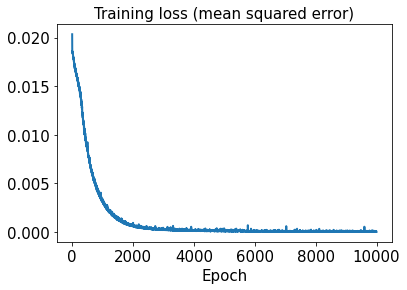

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

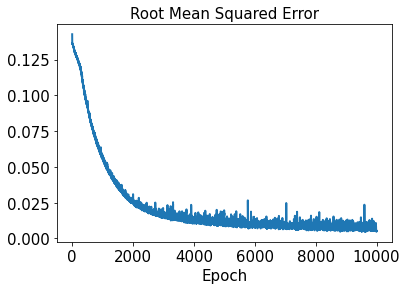

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.0012497917


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.009008806


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

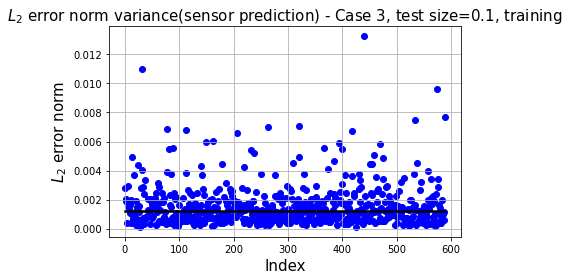

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 3, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

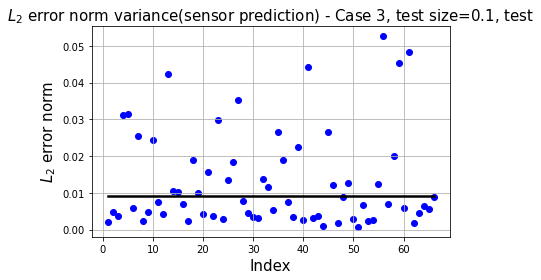

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 3, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 2/10000
15/15 [==============================] - 0s 16ms/step - loss: 0.0106 - rmse: 0.1024
Epoch 3/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0997
Epoch 4/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0920
Epoch 5/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0855
Epoch 6/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 7/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 8/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0825
Epoch 9/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0809
Epoch 10/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0789
Epoch 11/10000
15/15 [======

15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0416
Epoch 85/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 86/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 87/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0409
Epoch 88/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 89/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 90/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 91/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 92/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0396
Epoch 93/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0394
Epoch 94/10000
15/15 [=============

15/15 [==============================] - 0s 5ms/step - loss: 8.2034e-04 - rmse: 0.0255
Epoch 167/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1595e-04 - rmse: 0.0254
Epoch 168/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0652e-04 - rmse: 0.0252
Epoch 169/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0216e-04 - rmse: 0.0252
Epoch 170/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9625e-04 - rmse: 0.0250
Epoch 171/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8668e-04 - rmse: 0.0248
Epoch 172/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8044e-04 - rmse: 0.0247
Epoch 173/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7369e-04 - rmse: 0.0246
Epoch 174/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6845e-04 - rmse: 0.0245
Epoch 175/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6264e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 4.8674e-04 - rmse: 0.0178
Epoch 246/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8413e-04 - rmse: 0.0177
Epoch 247/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8226e-04 - rmse: 0.0177
Epoch 248/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8023e-04 - rmse: 0.0176
Epoch 249/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7658e-04 - rmse: 0.0175
Epoch 250/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7492e-04 - rmse: 0.0175
Epoch 251/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7346e-04 - rmse: 0.0174
Epoch 252/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7181e-04 - rmse: 0.0174
Epoch 253/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6731e-04 - rmse: 0.0173
Epoch 254/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6640e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 3.5240e-04 - rmse: 0.0136
Epoch 325/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5149e-04 - rmse: 0.0136
Epoch 326/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.5044e-04 - rmse: 0.0136
Epoch 327/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4964e-04 - rmse: 0.0136
Epoch 328/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4836e-04 - rmse: 0.0135
Epoch 329/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4607e-04 - rmse: 0.0134
Epoch 330/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4486e-04 - rmse: 0.0134
Epoch 331/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4339e-04 - rmse: 0.0133
Epoch 332/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4279e-04 - rmse: 0.0133
Epoch 333/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.4211e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 2.8463e-04 - rmse: 0.0111
Epoch 404/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8346e-04 - rmse: 0.0111
Epoch 405/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8271e-04 - rmse: 0.0110
Epoch 406/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8206e-04 - rmse: 0.0110
Epoch 407/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8091e-04 - rmse: 0.0110
Epoch 408/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8075e-04 - rmse: 0.0110
Epoch 409/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.8017e-04 - rmse: 0.0109
Epoch 410/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7998e-04 - rmse: 0.0109
Epoch 411/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7985e-04 - rmse: 0.0109
Epoch 412/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.7846e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 2.4380e-04 - rmse: 0.0094
Epoch 483/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4381e-04 - rmse: 0.0095
Epoch 484/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4295e-04 - rmse: 0.0094
Epoch 485/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4282e-04 - rmse: 0.0094
Epoch 486/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4192e-04 - rmse: 0.0094
Epoch 487/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4082e-04 - rmse: 0.0093
Epoch 488/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4086e-04 - rmse: 0.0093
Epoch 489/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4028e-04 - rmse: 0.0093
Epoch 490/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.3942e-04 - rmse: 0.0093
Epoch 491/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.4032e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 2.1588e-04 - rmse: 0.0083
Epoch 562/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1595e-04 - rmse: 0.0083
Epoch 563/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1490e-04 - rmse: 0.0082
Epoch 564/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1425e-04 - rmse: 0.0082
Epoch 565/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1399e-04 - rmse: 0.0082
Epoch 566/10000
15/15 [==============================] - 0s 6ms/step - loss: 2.1405e-04 - rmse: 0.0082
Epoch 567/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1449e-04 - rmse: 0.0082
Epoch 568/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1413e-04 - rmse: 0.0082
Epoch 569/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1394e-04 - rmse: 0.0082
Epoch 570/10000
15/15 [==============================] - 0s 5ms/step - loss: 2.1386e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.9526e-04 - rmse: 0.0074
Epoch 641/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9536e-04 - rmse: 0.0074
Epoch 642/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9513e-04 - rmse: 0.0074
Epoch 643/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9572e-04 - rmse: 0.0074
Epoch 644/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9446e-04 - rmse: 0.0074
Epoch 645/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9486e-04 - rmse: 0.0074
Epoch 646/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.9472e-04 - rmse: 0.0074
Epoch 647/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.9422e-04 - rmse: 0.0074
Epoch 648/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.9352e-04 - rmse: 0.0073
Epoch 649/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.9301e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.8097e-04 - rmse: 0.0069
Epoch 720/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8019e-04 - rmse: 0.0068
Epoch 721/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.8055e-04 - rmse: 0.0068
Epoch 722/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7975e-04 - rmse: 0.0068
Epoch 723/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7910e-04 - rmse: 0.0068
Epoch 724/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7894e-04 - rmse: 0.0067
Epoch 725/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7884e-04 - rmse: 0.0067
Epoch 726/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7891e-04 - rmse: 0.0068
Epoch 727/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7921e-04 - rmse: 0.0068
Epoch 728/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.7913e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.6741e-04 - rmse: 0.0063
Epoch 799/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6723e-04 - rmse: 0.0063
Epoch 800/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6724e-04 - rmse: 0.0063
Epoch 801/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6719e-04 - rmse: 0.0063
Epoch 802/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6671e-04 - rmse: 0.0063
Epoch 803/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6636e-04 - rmse: 0.0063
Epoch 804/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6627e-04 - rmse: 0.0063
Epoch 805/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6642e-04 - rmse: 0.0063
Epoch 806/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6618e-04 - rmse: 0.0063
Epoch 807/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.6576e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.5656e-04 - rmse: 0.0059
Epoch 878/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5604e-04 - rmse: 0.0059
Epoch 879/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5586e-04 - rmse: 0.0059
Epoch 880/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5591e-04 - rmse: 0.0059
Epoch 881/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5617e-04 - rmse: 0.0059
Epoch 882/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5673e-04 - rmse: 0.0060
Epoch 883/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5648e-04 - rmse: 0.0060
Epoch 884/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5591e-04 - rmse: 0.0059
Epoch 885/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5601e-04 - rmse: 0.0059
Epoch 886/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.5576e-04 -

15/15 [==============================] - 0s 6ms/step - loss: 1.4733e-04 - rmse: 0.0056
Epoch 957/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4744e-04 - rmse: 0.0056
Epoch 958/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4733e-04 - rmse: 0.0056
Epoch 959/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4706e-04 - rmse: 0.0056
Epoch 960/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4700e-04 - rmse: 0.0056
Epoch 961/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4738e-04 - rmse: 0.0057
Epoch 962/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4692e-04 - rmse: 0.0056
Epoch 963/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4708e-04 - rmse: 0.0056
Epoch 964/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4665e-04 - rmse: 0.0056
Epoch 965/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.4697e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.3913e-04 - rmse: 0.0053
Epoch 1036/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3942e-04 - rmse: 0.0054
Epoch 1037/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3933e-04 - rmse: 0.0054
Epoch 1038/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3941e-04 - rmse: 0.0054
Epoch 1039/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3919e-04 - rmse: 0.0054
Epoch 1040/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3943e-04 - rmse: 0.0054
Epoch 1041/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3893e-04 - rmse: 0.0054
Epoch 1042/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3928e-04 - rmse: 0.0054
Epoch 1043/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3924e-04 - rmse: 0.0054
Epoch 1044/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.3

15/15 [==============================] - 0s 5ms/step - loss: 1.3314e-04 - rmse: 0.0052
Epoch 1114/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3294e-04 - rmse: 0.0052
Epoch 1115/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3292e-04 - rmse: 0.0052
Epoch 1116/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3298e-04 - rmse: 0.0052
Epoch 1117/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3224e-04 - rmse: 0.0052
Epoch 1118/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3205e-04 - rmse: 0.0051
Epoch 1119/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3211e-04 - rmse: 0.0052
Epoch 1120/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3208e-04 - rmse: 0.0052
Epoch 1121/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3181e-04 - rmse: 0.0051
Epoch 1122/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.3

15/15 [==============================] - 0s 5ms/step - loss: 1.2677e-04 - rmse: 0.0050
Epoch 1192/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2726e-04 - rmse: 0.0051
Epoch 1193/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2665e-04 - rmse: 0.0050
Epoch 1194/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2687e-04 - rmse: 0.0051
Epoch 1195/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2653e-04 - rmse: 0.0050
Epoch 1196/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2578e-04 - rmse: 0.0050
Epoch 1197/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2584e-04 - rmse: 0.0050
Epoch 1198/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2607e-04 - rmse: 0.0050
Epoch 1199/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2602e-04 - rmse: 0.0050
Epoch 1200/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2

15/15 [==============================] - 0s 5ms/step - loss: 1.2150e-04 - rmse: 0.0049
Epoch 1270/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.2140e-04 - rmse: 0.0049
Epoch 1271/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2086e-04 - rmse: 0.0048
Epoch 1272/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2104e-04 - rmse: 0.0049
Epoch 1273/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2104e-04 - rmse: 0.0049
Epoch 1274/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2123e-04 - rmse: 0.0049
Epoch 1275/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2143e-04 - rmse: 0.0049
Epoch 1276/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2115e-04 - rmse: 0.0049
Epoch 1277/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2069e-04 - rmse: 0.0049
Epoch 1278/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.2

15/15 [==============================] - 0s 5ms/step - loss: 1.1581e-04 - rmse: 0.0047
Epoch 1348/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1565e-04 - rmse: 0.0047
Epoch 1349/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1615e-04 - rmse: 0.0047
Epoch 1350/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1580e-04 - rmse: 0.0047
Epoch 1351/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1574e-04 - rmse: 0.0047
Epoch 1352/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1576e-04 - rmse: 0.0047
Epoch 1353/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1584e-04 - rmse: 0.0047
Epoch 1354/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1583e-04 - rmse: 0.0047
Epoch 1355/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1592e-04 - rmse: 0.0047
Epoch 1356/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1

15/15 [==============================] - 0s 5ms/step - loss: 1.1174e-04 - rmse: 0.0046
Epoch 1426/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1146e-04 - rmse: 0.0046
Epoch 1427/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1132e-04 - rmse: 0.0046
Epoch 1428/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1151e-04 - rmse: 0.0046
Epoch 1429/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1125e-04 - rmse: 0.0046
Epoch 1430/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1121e-04 - rmse: 0.0046
Epoch 1431/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1102e-04 - rmse: 0.0046
Epoch 1432/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1117e-04 - rmse: 0.0046
Epoch 1433/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1088e-04 - rmse: 0.0045
Epoch 1434/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.1

15/15 [==============================] - 0s 5ms/step - loss: 1.0739e-04 - rmse: 0.0045
Epoch 1504/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0795e-04 - rmse: 0.0045
Epoch 1505/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0743e-04 - rmse: 0.0045
Epoch 1506/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0718e-04 - rmse: 0.0045
Epoch 1507/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0722e-04 - rmse: 0.0045
Epoch 1508/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0751e-04 - rmse: 0.0045
Epoch 1509/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0742e-04 - rmse: 0.0045
Epoch 1510/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0790e-04 - rmse: 0.0046
Epoch 1511/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0788e-04 - rmse: 0.0046
Epoch 1512/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0

15/15 [==============================] - 0s 5ms/step - loss: 1.0351e-04 - rmse: 0.0044
Epoch 1582/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0357e-04 - rmse: 0.0044
Epoch 1583/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0387e-04 - rmse: 0.0044
Epoch 1584/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0360e-04 - rmse: 0.0044
Epoch 1585/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0341e-04 - rmse: 0.0044
Epoch 1586/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0338e-04 - rmse: 0.0044
Epoch 1587/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0324e-04 - rmse: 0.0043
Epoch 1588/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0319e-04 - rmse: 0.0043
Epoch 1589/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0281e-04 - rmse: 0.0043
Epoch 1590/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0

15/15 [==============================] - 0s 5ms/step - loss: 1.0038e-04 - rmse: 0.0043
Epoch 1660/10000
15/15 [==============================] - 0s 6ms/step - loss: 1.0101e-04 - rmse: 0.0044
Epoch 1661/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0070e-04 - rmse: 0.0043
Epoch 1662/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0130e-04 - rmse: 0.0044
Epoch 1663/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0061e-04 - rmse: 0.0043
Epoch 1664/10000
15/15 [==============================] - 0s 5ms/step - loss: 1.0016e-04 - rmse: 0.0043
Epoch 1665/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9969e-05 - rmse: 0.0043
Epoch 1666/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9800e-05 - rmse: 0.0043
Epoch 1667/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9492e-05 - rmse: 0.0042
Epoch 1668/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.9

15/15 [==============================] - 0s 5ms/step - loss: 9.6874e-05 - rmse: 0.0042
Epoch 1738/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6627e-05 - rmse: 0.0042
Epoch 1739/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6440e-05 - rmse: 0.0041
Epoch 1740/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6613e-05 - rmse: 0.0042
Epoch 1741/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6535e-05 - rmse: 0.0042
Epoch 1742/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.7039e-05 - rmse: 0.0042
Epoch 1743/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6816e-05 - rmse: 0.0042
Epoch 1744/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6586e-05 - rmse: 0.0042
Epoch 1745/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6330e-05 - rmse: 0.0041
Epoch 1746/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.6

15/15 [==============================] - 0s 5ms/step - loss: 9.3789e-05 - rmse: 0.0041
Epoch 1816/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3788e-05 - rmse: 0.0041
Epoch 1817/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.4094e-05 - rmse: 0.0041
Epoch 1818/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.4067e-05 - rmse: 0.0041
Epoch 1819/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3953e-05 - rmse: 0.0041
Epoch 1820/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3815e-05 - rmse: 0.0041
Epoch 1821/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.4104e-05 - rmse: 0.0041
Epoch 1822/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3990e-05 - rmse: 0.0041
Epoch 1823/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.3651e-05 - rmse: 0.0041
Epoch 1824/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.3

15/15 [==============================] - 0s 5ms/step - loss: 9.1244e-05 - rmse: 0.0040
Epoch 1894/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.1142e-05 - rmse: 0.0040
Epoch 1895/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.1280e-05 - rmse: 0.0040
Epoch 1896/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0922e-05 - rmse: 0.0040
Epoch 1897/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0691e-05 - rmse: 0.0040
Epoch 1898/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0878e-05 - rmse: 0.0040
Epoch 1899/10000
15/15 [==============================] - 0s 6ms/step - loss: 9.0812e-05 - rmse: 0.0040
Epoch 1900/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0775e-05 - rmse: 0.0040
Epoch 1901/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0773e-05 - rmse: 0.0040
Epoch 1902/10000
15/15 [==============================] - 0s 5ms/step - loss: 9.0

15/15 [==============================] - 0s 5ms/step - loss: 8.8443e-05 - rmse: 0.0039
Epoch 1972/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8644e-05 - rmse: 0.0040
Epoch 1973/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8467e-05 - rmse: 0.0039
Epoch 1974/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.8394e-05 - rmse: 0.0039
Epoch 1975/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8081e-05 - rmse: 0.0039
Epoch 1976/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.7978e-05 - rmse: 0.0039
Epoch 1977/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.7814e-05 - rmse: 0.0039
Epoch 1978/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8090e-05 - rmse: 0.0039
Epoch 1979/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8357e-05 - rmse: 0.0039
Epoch 1980/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.8

15/15 [==============================] - 0s 5ms/step - loss: 8.6424e-05 - rmse: 0.0039
Epoch 2050/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6393e-05 - rmse: 0.0039
Epoch 2051/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6120e-05 - rmse: 0.0039
Epoch 2052/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6419e-05 - rmse: 0.0039
Epoch 2053/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6590e-05 - rmse: 0.0039
Epoch 2054/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6347e-05 - rmse: 0.0039
Epoch 2055/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6475e-05 - rmse: 0.0039
Epoch 2056/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6275e-05 - rmse: 0.0039
Epoch 2057/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.5898e-05 - rmse: 0.0039
Epoch 2058/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.6

15/15 [==============================] - 0s 5ms/step - loss: 8.4203e-05 - rmse: 0.0038
Epoch 2128/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4332e-05 - rmse: 0.0039
Epoch 2129/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4279e-05 - rmse: 0.0039
Epoch 2130/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4082e-05 - rmse: 0.0038
Epoch 2131/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4384e-05 - rmse: 0.0039
Epoch 2132/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4019e-05 - rmse: 0.0038
Epoch 2133/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4123e-05 - rmse: 0.0038
Epoch 2134/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.4120e-05 - rmse: 0.0038
Epoch 2135/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3575e-05 - rmse: 0.0038
Epoch 2136/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3

15/15 [==============================] - 0s 5ms/step - loss: 8.2104e-05 - rmse: 0.0038
Epoch 2206/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2248e-05 - rmse: 0.0038
Epoch 2207/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3017e-05 - rmse: 0.0039
Epoch 2208/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3149e-05 - rmse: 0.0039
Epoch 2209/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2503e-05 - rmse: 0.0038
Epoch 2210/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.3097e-05 - rmse: 0.0039
Epoch 2211/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2360e-05 - rmse: 0.0038
Epoch 2212/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.2011e-05 - rmse: 0.0038
Epoch 2213/10000
15/15 [==============================] - 0s 6ms/step - loss: 8.1917e-05 - rmse: 0.0038
Epoch 2214/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.1

15/15 [==============================] - 0s 5ms/step - loss: 8.0445e-05 - rmse: 0.0038
Epoch 2284/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0378e-05 - rmse: 0.0037
Epoch 2285/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0256e-05 - rmse: 0.0037
Epoch 2286/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9802e-05 - rmse: 0.0037
Epoch 2287/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0279e-05 - rmse: 0.0037
Epoch 2288/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0003e-05 - rmse: 0.0037
Epoch 2289/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0167e-05 - rmse: 0.0037
Epoch 2290/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0280e-05 - rmse: 0.0038
Epoch 2291/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9956e-05 - rmse: 0.0037
Epoch 2292/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9

15/15 [==============================] - 0s 5ms/step - loss: 7.7971e-05 - rmse: 0.0036
Epoch 2362/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7797e-05 - rmse: 0.0036
Epoch 2363/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8361e-05 - rmse: 0.0037
Epoch 2364/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.8395e-05 - rmse: 0.0037
Epoch 2365/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8264e-05 - rmse: 0.0037
Epoch 2366/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8507e-05 - rmse: 0.0037
Epoch 2367/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8625e-05 - rmse: 0.0037
Epoch 2368/10000
15/15 [==============================] - 0s 5ms/step - loss: 8.0159e-05 - rmse: 0.0039
Epoch 2369/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.9050e-05 - rmse: 0.0038
Epoch 2370/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.8

15/15 [==============================] - 0s 5ms/step - loss: 7.6581e-05 - rmse: 0.0036
Epoch 2440/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.6701e-05 - rmse: 0.0036
Epoch 2441/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.7169e-05 - rmse: 0.0037
Epoch 2442/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6780e-05 - rmse: 0.0036
Epoch 2443/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6447e-05 - rmse: 0.0036
Epoch 2444/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6443e-05 - rmse: 0.0036
Epoch 2445/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6553e-05 - rmse: 0.0036
Epoch 2446/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6530e-05 - rmse: 0.0036
Epoch 2447/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6750e-05 - rmse: 0.0036
Epoch 2448/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.6

15/15 [==============================] - 0s 5ms/step - loss: 7.5045e-05 - rmse: 0.0036
Epoch 2518/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5016e-05 - rmse: 0.0036
Epoch 2519/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5094e-05 - rmse: 0.0036
Epoch 2520/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4735e-05 - rmse: 0.0035
Epoch 2521/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4808e-05 - rmse: 0.0035
Epoch 2522/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5039e-05 - rmse: 0.0036
Epoch 2523/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5145e-05 - rmse: 0.0036
Epoch 2524/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.4600e-05 - rmse: 0.0035
Epoch 2525/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5103e-05 - rmse: 0.0036
Epoch 2526/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.5

15/15 [==============================] - 0s 5ms/step - loss: 7.3223e-05 - rmse: 0.0035
Epoch 2596/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2960e-05 - rmse: 0.0034
Epoch 2597/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3298e-05 - rmse: 0.0035
Epoch 2598/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3305e-05 - rmse: 0.0035
Epoch 2599/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3242e-05 - rmse: 0.0035
Epoch 2600/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3391e-05 - rmse: 0.0035
Epoch 2601/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3272e-05 - rmse: 0.0035
Epoch 2602/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3561e-05 - rmse: 0.0035
Epoch 2603/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.3546e-05 - rmse: 0.0035
Epoch 2604/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.3

15/15 [==============================] - 0s 5ms/step - loss: 7.2178e-05 - rmse: 0.0035
Epoch 2674/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2230e-05 - rmse: 0.0035
Epoch 2675/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2944e-05 - rmse: 0.0036
Epoch 2676/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2523e-05 - rmse: 0.0035
Epoch 2677/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2469e-05 - rmse: 0.0035
Epoch 2678/10000
15/15 [==============================] - 0s 6ms/step - loss: 7.2162e-05 - rmse: 0.0035
Epoch 2679/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1974e-05 - rmse: 0.0035
Epoch 2680/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2292e-05 - rmse: 0.0035
Epoch 2681/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2205e-05 - rmse: 0.0035
Epoch 2682/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.2

15/15 [==============================] - 0s 5ms/step - loss: 7.1613e-05 - rmse: 0.0035
Epoch 2752/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1563e-05 - rmse: 0.0035
Epoch 2753/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1199e-05 - rmse: 0.0035
Epoch 2754/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0759e-05 - rmse: 0.0034
Epoch 2755/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0703e-05 - rmse: 0.0034
Epoch 2756/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0797e-05 - rmse: 0.0034
Epoch 2757/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0767e-05 - rmse: 0.0034
Epoch 2758/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0649e-05 - rmse: 0.0034
Epoch 2759/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1084e-05 - rmse: 0.0035
Epoch 2760/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.1

15/15 [==============================] - 0s 6ms/step - loss: 6.9673e-05 - rmse: 0.0034
Epoch 2830/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9897e-05 - rmse: 0.0034
Epoch 2831/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9791e-05 - rmse: 0.0034
Epoch 2832/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9605e-05 - rmse: 0.0034
Epoch 2833/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9825e-05 - rmse: 0.0034
Epoch 2834/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9765e-05 - rmse: 0.0034
Epoch 2835/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9623e-05 - rmse: 0.0034
Epoch 2836/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9727e-05 - rmse: 0.0034
Epoch 2837/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0028e-05 - rmse: 0.0035
Epoch 2838/10000
15/15 [==============================] - 0s 5ms/step - loss: 7.0

15/15 [==============================] - 0s 5ms/step - loss: 6.8576e-05 - rmse: 0.0034
Epoch 2908/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8194e-05 - rmse: 0.0033
Epoch 2909/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8223e-05 - rmse: 0.0033
Epoch 2910/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8342e-05 - rmse: 0.0034
Epoch 2911/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8259e-05 - rmse: 0.0034
Epoch 2912/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8613e-05 - rmse: 0.0034
Epoch 2913/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.9098e-05 - rmse: 0.0035
Epoch 2914/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8526e-05 - rmse: 0.0034
Epoch 2915/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8311e-05 - rmse: 0.0034
Epoch 2916/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8

15/15 [==============================] - 0s 5ms/step - loss: 6.7480e-05 - rmse: 0.0034
Epoch 2986/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.8131e-05 - rmse: 0.0035
Epoch 2987/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7709e-05 - rmse: 0.0034
Epoch 2988/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7210e-05 - rmse: 0.0033
Epoch 2989/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7597e-05 - rmse: 0.0034
Epoch 2990/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7265e-05 - rmse: 0.0033
Epoch 2991/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6891e-05 - rmse: 0.0033
Epoch 2992/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.6855e-05 - rmse: 0.0033
Epoch 2993/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7051e-05 - rmse: 0.0033
Epoch 2994/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.7

15/15 [==============================] - 0s 5ms/step - loss: 6.6419e-05 - rmse: 0.0033
Epoch 3064/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6237e-05 - rmse: 0.0033
Epoch 3065/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5987e-05 - rmse: 0.0033
Epoch 3066/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6018e-05 - rmse: 0.0033
Epoch 3067/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6001e-05 - rmse: 0.0033
Epoch 3068/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6173e-05 - rmse: 0.0033
Epoch 3069/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6411e-05 - rmse: 0.0033
Epoch 3070/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6740e-05 - rmse: 0.0034
Epoch 3071/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6592e-05 - rmse: 0.0034
Epoch 3072/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6

15/15 [==============================] - 0s 5ms/step - loss: 6.6234e-05 - rmse: 0.0034
Epoch 3142/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.6019e-05 - rmse: 0.0034
Epoch 3143/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.5488e-05 - rmse: 0.0033
Epoch 3144/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5552e-05 - rmse: 0.0033
Epoch 3145/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5455e-05 - rmse: 0.0033
Epoch 3146/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5391e-05 - rmse: 0.0033
Epoch 3147/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5088e-05 - rmse: 0.0033
Epoch 3148/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5047e-05 - rmse: 0.0033
Epoch 3149/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4756e-05 - rmse: 0.0032
Epoch 3150/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.5

15/15 [==============================] - 0s 5ms/step - loss: 6.4075e-05 - rmse: 0.0032
Epoch 3220/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4324e-05 - rmse: 0.0032
Epoch 3221/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4208e-05 - rmse: 0.0032
Epoch 3222/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4119e-05 - rmse: 0.0032
Epoch 3223/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4350e-05 - rmse: 0.0033
Epoch 3224/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4642e-05 - rmse: 0.0033
Epoch 3225/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4157e-05 - rmse: 0.0032
Epoch 3226/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4252e-05 - rmse: 0.0032
Epoch 3227/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4356e-05 - rmse: 0.0033
Epoch 3228/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4

15/15 [==============================] - 0s 5ms/step - loss: 6.3663e-05 - rmse: 0.0033
Epoch 3298/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3621e-05 - rmse: 0.0033
Epoch 3299/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3547e-05 - rmse: 0.0032
Epoch 3300/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3639e-05 - rmse: 0.0033
Epoch 3301/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3355e-05 - rmse: 0.0032
Epoch 3302/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3537e-05 - rmse: 0.0032
Epoch 3303/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3379e-05 - rmse: 0.0032
Epoch 3304/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.3489e-05 - rmse: 0.0032
Epoch 3305/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.4021e-05 - rmse: 0.0033
Epoch 3306/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.4

15/15 [==============================] - 0s 5ms/step - loss: 6.2476e-05 - rmse: 0.0032
Epoch 3376/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2444e-05 - rmse: 0.0032
Epoch 3377/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2343e-05 - rmse: 0.0032
Epoch 3378/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2237e-05 - rmse: 0.0031
Epoch 3379/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2225e-05 - rmse: 0.0031
Epoch 3380/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2478e-05 - rmse: 0.0032
Epoch 3381/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.2367e-05 - rmse: 0.0032
Epoch 3382/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2439e-05 - rmse: 0.0032
Epoch 3383/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2851e-05 - rmse: 0.0032
Epoch 3384/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.2

15/15 [==============================] - 0s 5ms/step - loss: 6.1524e-05 - rmse: 0.0031
Epoch 3454/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1611e-05 - rmse: 0.0031
Epoch 3455/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1555e-05 - rmse: 0.0031
Epoch 3456/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1710e-05 - rmse: 0.0032
Epoch 3457/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1735e-05 - rmse: 0.0032
Epoch 3458/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1762e-05 - rmse: 0.0032
Epoch 3459/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1642e-05 - rmse: 0.0032
Epoch 3460/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1454e-05 - rmse: 0.0031
Epoch 3461/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1670e-05 - rmse: 0.0032
Epoch 3462/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1

15/15 [==============================] - 0s 5ms/step - loss: 6.1118e-05 - rmse: 0.0032
Epoch 3532/10000
15/15 [==============================] - 0s 6ms/step - loss: 6.1037e-05 - rmse: 0.0032
Epoch 3533/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0669e-05 - rmse: 0.0031
Epoch 3534/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0982e-05 - rmse: 0.0032
Epoch 3535/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0720e-05 - rmse: 0.0031
Epoch 3536/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0766e-05 - rmse: 0.0031
Epoch 3537/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1228e-05 - rmse: 0.0032
Epoch 3538/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1133e-05 - rmse: 0.0032
Epoch 3539/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1317e-05 - rmse: 0.0032
Epoch 3540/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0

15/15 [==============================] - 0s 5ms/step - loss: 6.0099e-05 - rmse: 0.0031
Epoch 3610/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0076e-05 - rmse: 0.0031
Epoch 3611/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0289e-05 - rmse: 0.0031
Epoch 3612/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0026e-05 - rmse: 0.0031
Epoch 3613/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0184e-05 - rmse: 0.0031
Epoch 3614/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0291e-05 - rmse: 0.0031
Epoch 3615/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0302e-05 - rmse: 0.0031
Epoch 3616/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9907e-05 - rmse: 0.0031
Epoch 3617/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9781e-05 - rmse: 0.0031
Epoch 3618/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9

15/15 [==============================] - 0s 5ms/step - loss: 5.9166e-05 - rmse: 0.0030
Epoch 3688/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9363e-05 - rmse: 0.0031
Epoch 3689/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8987e-05 - rmse: 0.0030
Epoch 3690/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9010e-05 - rmse: 0.0030
Epoch 3691/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9050e-05 - rmse: 0.0030
Epoch 3692/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9400e-05 - rmse: 0.0031
Epoch 3693/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9449e-05 - rmse: 0.0031
Epoch 3694/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.9451e-05 - rmse: 0.0031
Epoch 3695/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.0805e-05 - rmse: 0.0033
Epoch 3696/10000
15/15 [==============================] - 0s 5ms/step - loss: 6.1

15/15 [==============================] - 0s 5ms/step - loss: 5.8790e-05 - rmse: 0.0031
Epoch 3766/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8759e-05 - rmse: 0.0031
Epoch 3767/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8692e-05 - rmse: 0.0031
Epoch 3768/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8310e-05 - rmse: 0.0030
Epoch 3769/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8415e-05 - rmse: 0.0030
Epoch 3770/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8493e-05 - rmse: 0.0030
Epoch 3771/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.8686e-05 - rmse: 0.0031
Epoch 3772/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8593e-05 - rmse: 0.0030
Epoch 3773/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8619e-05 - rmse: 0.0031
Epoch 3774/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8

15/15 [==============================] - 0s 5ms/step - loss: 5.7922e-05 - rmse: 0.0030
Epoch 3844/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8044e-05 - rmse: 0.0030
Epoch 3845/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8172e-05 - rmse: 0.0031
Epoch 3846/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8191e-05 - rmse: 0.0031
Epoch 3847/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7825e-05 - rmse: 0.0030
Epoch 3848/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8152e-05 - rmse: 0.0031
Epoch 3849/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8088e-05 - rmse: 0.0030
Epoch 3850/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8037e-05 - rmse: 0.0030
Epoch 3851/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7884e-05 - rmse: 0.0030
Epoch 3852/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7

15/15 [==============================] - 0s 5ms/step - loss: 5.7185e-05 - rmse: 0.0030
Epoch 3922/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7222e-05 - rmse: 0.0030
Epoch 3923/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7328e-05 - rmse: 0.0030
Epoch 3924/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7358e-05 - rmse: 0.0030
Epoch 3925/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7151e-05 - rmse: 0.0030
Epoch 3926/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7066e-05 - rmse: 0.0030
Epoch 3927/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7235e-05 - rmse: 0.0030
Epoch 3928/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7659e-05 - rmse: 0.0031
Epoch 3929/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7489e-05 - rmse: 0.0030
Epoch 3930/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7

15/15 [==============================] - 0s 5ms/step - loss: 5.6698e-05 - rmse: 0.0030
Epoch 4000/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6683e-05 - rmse: 0.0030
Epoch 4001/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6752e-05 - rmse: 0.0030
Epoch 4002/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6658e-05 - rmse: 0.0030
Epoch 4003/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6671e-05 - rmse: 0.0030
Epoch 4004/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6803e-05 - rmse: 0.0030
Epoch 4005/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7118e-05 - rmse: 0.0031
Epoch 4006/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6727e-05 - rmse: 0.0030
Epoch 4007/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6832e-05 - rmse: 0.0030
Epoch 4008/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.7

15/15 [==============================] - 0s 5ms/step - loss: 5.5768e-05 - rmse: 0.0029
Epoch 4078/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5926e-05 - rmse: 0.0029
Epoch 4079/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6155e-05 - rmse: 0.0030
Epoch 4080/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5985e-05 - rmse: 0.0029
Epoch 4081/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5686e-05 - rmse: 0.0029
Epoch 4082/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6224e-05 - rmse: 0.0030
Epoch 4083/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.7094e-05 - rmse: 0.0031
Epoch 4084/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.8337e-05 - rmse: 0.0033
Epoch 4085/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6990e-05 - rmse: 0.0031
Epoch 4086/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6

15/15 [==============================] - 0s 5ms/step - loss: 5.5209e-05 - rmse: 0.0029
Epoch 4156/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5141e-05 - rmse: 0.0029
Epoch 4157/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5136e-05 - rmse: 0.0029
Epoch 4158/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5276e-05 - rmse: 0.0029
Epoch 4159/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5257e-05 - rmse: 0.0029
Epoch 4160/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5549e-05 - rmse: 0.0029
Epoch 4161/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5536e-05 - rmse: 0.0029
Epoch 4162/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5762e-05 - rmse: 0.0030
Epoch 4163/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.6025e-05 - rmse: 0.0030
Epoch 4164/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5

15/15 [==============================] - 0s 5ms/step - loss: 5.4899e-05 - rmse: 0.0029
Epoch 4234/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5368e-05 - rmse: 0.0030
Epoch 4235/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.5733e-05 - rmse: 0.0030
Epoch 4236/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5563e-05 - rmse: 0.0030
Epoch 4237/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5056e-05 - rmse: 0.0029
Epoch 4238/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5305e-05 - rmse: 0.0030
Epoch 4239/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4780e-05 - rmse: 0.0029
Epoch 4240/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4984e-05 - rmse: 0.0029
Epoch 4241/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5349e-05 - rmse: 0.0030
Epoch 4242/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.4697e-05 - rmse: 0.0029
Epoch 4312/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4818e-05 - rmse: 0.0030
Epoch 4313/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4753e-05 - rmse: 0.0029
Epoch 4314/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4464e-05 - rmse: 0.0029
Epoch 4315/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4094e-05 - rmse: 0.0028
Epoch 4316/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4319e-05 - rmse: 0.0029
Epoch 4317/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4128e-05 - rmse: 0.0028
Epoch 4318/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4163e-05 - rmse: 0.0029
Epoch 4319/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4798e-05 - rmse: 0.0030
Epoch 4320/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.4125e-05 - rmse: 0.0029
Epoch 4390/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4526e-05 - rmse: 0.0030
Epoch 4391/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4984e-05 - rmse: 0.0031
Epoch 4392/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5015e-05 - rmse: 0.0031
Epoch 4393/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4204e-05 - rmse: 0.0029
Epoch 4394/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4300e-05 - rmse: 0.0029
Epoch 4395/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4175e-05 - rmse: 0.0029
Epoch 4396/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.5232e-05 - rmse: 0.0031
Epoch 4397/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4950e-05 - rmse: 0.0031
Epoch 4398/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4

15/15 [==============================] - 0s 5ms/step - loss: 5.3878e-05 - rmse: 0.0029
Epoch 4468/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4136e-05 - rmse: 0.0030
Epoch 4469/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3656e-05 - rmse: 0.0029
Epoch 4470/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3946e-05 - rmse: 0.0029
Epoch 4471/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.4056e-05 - rmse: 0.0030
Epoch 4472/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.4402e-05 - rmse: 0.0030
Epoch 4473/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3893e-05 - rmse: 0.0029
Epoch 4474/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3560e-05 - rmse: 0.0029
Epoch 4475/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3573e-05 - rmse: 0.0029
Epoch 4476/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3

15/15 [==============================] - 0s 5ms/step - loss: 5.3218e-05 - rmse: 0.0029
Epoch 4546/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3199e-05 - rmse: 0.0029
Epoch 4547/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3870e-05 - rmse: 0.0030
Epoch 4548/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.3770e-05 - rmse: 0.0030
Epoch 4549/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3596e-05 - rmse: 0.0030
Epoch 4550/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3491e-05 - rmse: 0.0029
Epoch 4551/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3199e-05 - rmse: 0.0029
Epoch 4552/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2848e-05 - rmse: 0.0028
Epoch 4553/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2623e-05 - rmse: 0.0028
Epoch 4554/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2

15/15 [==============================] - 0s 6ms/step - loss: 5.2817e-05 - rmse: 0.0029
Epoch 4624/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2643e-05 - rmse: 0.0028
Epoch 4625/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2578e-05 - rmse: 0.0028
Epoch 4626/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2602e-05 - rmse: 0.0028
Epoch 4627/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2346e-05 - rmse: 0.0028
Epoch 4628/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2303e-05 - rmse: 0.0028
Epoch 4629/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2611e-05 - rmse: 0.0028
Epoch 4630/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.3009e-05 - rmse: 0.0029
Epoch 4631/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2570e-05 - rmse: 0.0028
Epoch 4632/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2

15/15 [==============================] - 0s 5ms/step - loss: 5.2112e-05 - rmse: 0.0028
Epoch 4702/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2226e-05 - rmse: 0.0028
Epoch 4703/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2064e-05 - rmse: 0.0028
Epoch 4704/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2454e-05 - rmse: 0.0029
Epoch 4705/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2531e-05 - rmse: 0.0029
Epoch 4706/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2599e-05 - rmse: 0.0029
Epoch 4707/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2737e-05 - rmse: 0.0029
Epoch 4708/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2504e-05 - rmse: 0.0029
Epoch 4709/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2306e-05 - rmse: 0.0029
Epoch 4710/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1

15/15 [==============================] - 0s 5ms/step - loss: 5.1621e-05 - rmse: 0.0028
Epoch 4780/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1556e-05 - rmse: 0.0028
Epoch 4781/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1376e-05 - rmse: 0.0027
Epoch 4782/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1667e-05 - rmse: 0.0028
Epoch 4783/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2151e-05 - rmse: 0.0029
Epoch 4784/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2282e-05 - rmse: 0.0029
Epoch 4785/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2579e-05 - rmse: 0.0030
Epoch 4786/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2649e-05 - rmse: 0.0030
Epoch 4787/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.2594e-05 - rmse: 0.0030
Epoch 4788/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.2

15/15 [==============================] - 0s 5ms/step - loss: 5.1172e-05 - rmse: 0.0028
Epoch 4858/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1302e-05 - rmse: 0.0028
Epoch 4859/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1177e-05 - rmse: 0.0028
Epoch 4860/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1157e-05 - rmse: 0.0028
Epoch 4861/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1171e-05 - rmse: 0.0028
Epoch 4862/10000
15/15 [==============================] - 0s 6ms/step - loss: 5.1271e-05 - rmse: 0.0028
Epoch 4863/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1155e-05 - rmse: 0.0028
Epoch 4864/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0979e-05 - rmse: 0.0027
Epoch 4865/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0961e-05 - rmse: 0.0027
Epoch 4866/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 5.0819e-05 - rmse: 0.0028
Epoch 4936/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1248e-05 - rmse: 0.0028
Epoch 4937/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1614e-05 - rmse: 0.0029
Epoch 4938/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1048e-05 - rmse: 0.0028
Epoch 4939/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1132e-05 - rmse: 0.0028
Epoch 4940/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0671e-05 - rmse: 0.0027
Epoch 4941/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0756e-05 - rmse: 0.0027
Epoch 4942/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0845e-05 - rmse: 0.0028
Epoch 4943/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0866e-05 - rmse: 0.0028
Epoch 4944/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 6ms/step - loss: 5.0719e-05 - rmse: 0.0028
Epoch 5014/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0753e-05 - rmse: 0.0028
Epoch 5015/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0911e-05 - rmse: 0.0028
Epoch 5016/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.1111e-05 - rmse: 0.0029
Epoch 5017/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0619e-05 - rmse: 0.0028
Epoch 5018/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0585e-05 - rmse: 0.0028
Epoch 5019/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0459e-05 - rmse: 0.0028
Epoch 5020/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0561e-05 - rmse: 0.0028
Epoch 5021/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0212e-05 - rmse: 0.0027
Epoch 5022/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9

15/15 [==============================] - 0s 5ms/step - loss: 5.0086e-05 - rmse: 0.0027
Epoch 5092/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9997e-05 - rmse: 0.0027
Epoch 5093/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0326e-05 - rmse: 0.0028
Epoch 5094/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0457e-05 - rmse: 0.0028
Epoch 5095/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0309e-05 - rmse: 0.0028
Epoch 5096/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0320e-05 - rmse: 0.0028
Epoch 5097/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0181e-05 - rmse: 0.0028
Epoch 5098/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0188e-05 - rmse: 0.0028
Epoch 5099/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0119e-05 - rmse: 0.0027
Epoch 5100/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 4.9625e-05 - rmse: 0.0027
Epoch 5170/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9609e-05 - rmse: 0.0027
Epoch 5171/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9865e-05 - rmse: 0.0027
Epoch 5172/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0066e-05 - rmse: 0.0028
Epoch 5173/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9873e-05 - rmse: 0.0027
Epoch 5174/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0846e-05 - rmse: 0.0029
Epoch 5175/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0603e-05 - rmse: 0.0029
Epoch 5176/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9778e-05 - rmse: 0.0027
Epoch 5177/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0210e-05 - rmse: 0.0028
Epoch 5178/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 4.9293e-05 - rmse: 0.0027
Epoch 5248/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9321e-05 - rmse: 0.0027
Epoch 5249/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9539e-05 - rmse: 0.0027
Epoch 5250/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9572e-05 - rmse: 0.0027
Epoch 5251/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9729e-05 - rmse: 0.0028
Epoch 5252/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9585e-05 - rmse: 0.0027
Epoch 5253/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0018e-05 - rmse: 0.0028
Epoch 5254/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0910e-05 - rmse: 0.0030
Epoch 5255/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0346e-05 - rmse: 0.0029
Epoch 5256/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0

15/15 [==============================] - 0s 5ms/step - loss: 4.9262e-05 - rmse: 0.0027
Epoch 5326/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9285e-05 - rmse: 0.0027
Epoch 5327/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.9027e-05 - rmse: 0.0027
Epoch 5328/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9198e-05 - rmse: 0.0027
Epoch 5329/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9069e-05 - rmse: 0.0027
Epoch 5330/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9392e-05 - rmse: 0.0028
Epoch 5331/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9532e-05 - rmse: 0.0028
Epoch 5332/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9906e-05 - rmse: 0.0029
Epoch 5333/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0845e-05 - rmse: 0.0030
Epoch 5334/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9

15/15 [==============================] - 0s 5ms/step - loss: 5.0149e-05 - rmse: 0.0029
Epoch 5404/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9576e-05 - rmse: 0.0028
Epoch 5405/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9079e-05 - rmse: 0.0027
Epoch 5406/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8743e-05 - rmse: 0.0027
Epoch 5407/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8871e-05 - rmse: 0.0027
Epoch 5408/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8669e-05 - rmse: 0.0027
Epoch 5409/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8428e-05 - rmse: 0.0026
Epoch 5410/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8511e-05 - rmse: 0.0026
Epoch 5411/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9020e-05 - rmse: 0.0027
Epoch 5412/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9

15/15 [==============================] - 0s 5ms/step - loss: 4.8248e-05 - rmse: 0.0026
Epoch 5482/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8482e-05 - rmse: 0.0027
Epoch 5483/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8621e-05 - rmse: 0.0027
Epoch 5484/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8572e-05 - rmse: 0.0027
Epoch 5485/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8590e-05 - rmse: 0.0027
Epoch 5486/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8767e-05 - rmse: 0.0027
Epoch 5487/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8700e-05 - rmse: 0.0027
Epoch 5488/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8402e-05 - rmse: 0.0027
Epoch 5489/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8437e-05 - rmse: 0.0027
Epoch 5490/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8

15/15 [==============================] - 0s 5ms/step - loss: 4.8485e-05 - rmse: 0.0027
Epoch 5560/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8461e-05 - rmse: 0.0027
Epoch 5561/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8998e-05 - rmse: 0.0028
Epoch 5562/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8429e-05 - rmse: 0.0027
Epoch 5563/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8872e-05 - rmse: 0.0028
Epoch 5564/10000
15/15 [==============================] - 0s 5ms/step - loss: 5.0043e-05 - rmse: 0.0030
Epoch 5565/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.9755e-05 - rmse: 0.0030
Epoch 5566/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.8899e-05 - rmse: 0.0028
Epoch 5567/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8538e-05 - rmse: 0.0027
Epoch 5568/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8

15/15 [==============================] - 0s 5ms/step - loss: 4.8473e-05 - rmse: 0.0028
Epoch 5638/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8105e-05 - rmse: 0.0027
Epoch 5639/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.8092e-05 - rmse: 0.0027
Epoch 5640/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7990e-05 - rmse: 0.0027
Epoch 5641/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7683e-05 - rmse: 0.0026
Epoch 5642/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7718e-05 - rmse: 0.0026
Epoch 5643/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7608e-05 - rmse: 0.0026
Epoch 5644/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7815e-05 - rmse: 0.0027
Epoch 5645/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7776e-05 - rmse: 0.0026
Epoch 5646/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.7289e-05 - rmse: 0.0026
Epoch 5716/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7449e-05 - rmse: 0.0026
Epoch 5717/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.7771e-05 - rmse: 0.0027
Epoch 5718/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7681e-05 - rmse: 0.0027
Epoch 5719/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7373e-05 - rmse: 0.0026
Epoch 5720/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7196e-05 - rmse: 0.0026
Epoch 5721/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7150e-05 - rmse: 0.0026
Epoch 5722/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7437e-05 - rmse: 0.0026
Epoch 5723/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7865e-05 - rmse: 0.0027
Epoch 5724/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.7005e-05 - rmse: 0.0026
Epoch 5794/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7150e-05 - rmse: 0.0026
Epoch 5795/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7058e-05 - rmse: 0.0026
Epoch 5796/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7073e-05 - rmse: 0.0026
Epoch 5797/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7054e-05 - rmse: 0.0026
Epoch 5798/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7075e-05 - rmse: 0.0026
Epoch 5799/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7711e-05 - rmse: 0.0027
Epoch 5800/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7951e-05 - rmse: 0.0028
Epoch 5801/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7419e-05 - rmse: 0.0027
Epoch 5802/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.7748e-05 - rmse: 0.0028
Epoch 5872/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7080e-05 - rmse: 0.0026
Epoch 5873/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7650e-05 - rmse: 0.0027
Epoch 5874/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7615e-05 - rmse: 0.0027
Epoch 5875/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7689e-05 - rmse: 0.0028
Epoch 5876/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7496e-05 - rmse: 0.0027
Epoch 5877/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7113e-05 - rmse: 0.0027
Epoch 5878/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6740e-05 - rmse: 0.0026
Epoch 5879/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6766e-05 - rmse: 0.0026
Epoch 5880/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.6857e-05 - rmse: 0.0026
Epoch 5950/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7327e-05 - rmse: 0.0027
Epoch 5951/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6561e-05 - rmse: 0.0026
Epoch 5952/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6569e-05 - rmse: 0.0026
Epoch 5953/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6476e-05 - rmse: 0.0026
Epoch 5954/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6242e-05 - rmse: 0.0025
Epoch 5955/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6907e-05 - rmse: 0.0027
Epoch 5956/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7415e-05 - rmse: 0.0027
Epoch 5957/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7097e-05 - rmse: 0.0027
Epoch 5958/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 5ms/step - loss: 4.5988e-05 - rmse: 0.0025
Epoch 6028/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5939e-05 - rmse: 0.0025
Epoch 6029/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6319e-05 - rmse: 0.0026
Epoch 6030/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6610e-05 - rmse: 0.0026
Epoch 6031/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.6754e-05 - rmse: 0.0027
Epoch 6032/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6503e-05 - rmse: 0.0026
Epoch 6033/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6756e-05 - rmse: 0.0027
Epoch 6034/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7125e-05 - rmse: 0.0027
Epoch 6035/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6755e-05 - rmse: 0.0027
Epoch 6036/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.7

15/15 [==============================] - 0s 5ms/step - loss: 4.6119e-05 - rmse: 0.0026
Epoch 6106/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6104e-05 - rmse: 0.0026
Epoch 6107/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5993e-05 - rmse: 0.0026
Epoch 6108/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6406e-05 - rmse: 0.0026
Epoch 6109/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6369e-05 - rmse: 0.0026
Epoch 6110/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6237e-05 - rmse: 0.0026
Epoch 6111/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6371e-05 - rmse: 0.0026
Epoch 6112/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6391e-05 - rmse: 0.0026
Epoch 6113/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6021e-05 - rmse: 0.0026
Epoch 6114/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.5882e-05 - rmse: 0.0026
Epoch 6184/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5426e-05 - rmse: 0.0025
Epoch 6185/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5330e-05 - rmse: 0.0025
Epoch 6186/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5573e-05 - rmse: 0.0025
Epoch 6187/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5647e-05 - rmse: 0.0025
Epoch 6188/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5480e-05 - rmse: 0.0025
Epoch 6189/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5818e-05 - rmse: 0.0026
Epoch 6190/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6685e-05 - rmse: 0.0027
Epoch 6191/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6846e-05 - rmse: 0.0028
Epoch 6192/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 5ms/step - loss: 4.5565e-05 - rmse: 0.0025
Epoch 6262/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5792e-05 - rmse: 0.0026
Epoch 6263/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5953e-05 - rmse: 0.0026
Epoch 6264/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5948e-05 - rmse: 0.0026
Epoch 6265/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5989e-05 - rmse: 0.0026
Epoch 6266/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6929e-05 - rmse: 0.0028
Epoch 6267/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6645e-05 - rmse: 0.0028
Epoch 6268/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6722e-05 - rmse: 0.0028
Epoch 6269/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5910e-05 - rmse: 0.0026
Epoch 6270/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6

15/15 [==============================] - 0s 5ms/step - loss: 4.5417e-05 - rmse: 0.0026
Epoch 6340/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5562e-05 - rmse: 0.0026
Epoch 6341/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5715e-05 - rmse: 0.0026
Epoch 6342/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5854e-05 - rmse: 0.0026
Epoch 6343/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5830e-05 - rmse: 0.0026
Epoch 6344/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5825e-05 - rmse: 0.0026
Epoch 6345/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6038e-05 - rmse: 0.0027
Epoch 6346/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.6308e-05 - rmse: 0.0027
Epoch 6347/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5685e-05 - rmse: 0.0026
Epoch 6348/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.5171e-05 - rmse: 0.0025
Epoch 6418/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5132e-05 - rmse: 0.0025
Epoch 6419/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5257e-05 - rmse: 0.0026
Epoch 6420/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5373e-05 - rmse: 0.0026
Epoch 6421/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5212e-05 - rmse: 0.0026
Epoch 6422/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5689e-05 - rmse: 0.0026
Epoch 6423/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5311e-05 - rmse: 0.0026
Epoch 6424/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5396e-05 - rmse: 0.0026
Epoch 6425/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5397e-05 - rmse: 0.0026
Epoch 6426/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.5247e-05 - rmse: 0.0026
Epoch 6496/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5299e-05 - rmse: 0.0026
Epoch 6497/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5065e-05 - rmse: 0.0026
Epoch 6498/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.5049e-05 - rmse: 0.0026
Epoch 6499/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5003e-05 - rmse: 0.0025
Epoch 6500/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4898e-05 - rmse: 0.0025
Epoch 6501/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5120e-05 - rmse: 0.0026
Epoch 6502/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5450e-05 - rmse: 0.0026
Epoch 6503/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5539e-05 - rmse: 0.0027
Epoch 6504/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.5309e-05 - rmse: 0.0026
Epoch 6574/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5687e-05 - rmse: 0.0027
Epoch 6575/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5712e-05 - rmse: 0.0027
Epoch 6576/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4977e-05 - rmse: 0.0026
Epoch 6577/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4549e-05 - rmse: 0.0025
Epoch 6578/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4508e-05 - rmse: 0.0025
Epoch 6579/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4890e-05 - rmse: 0.0026
Epoch 6580/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4926e-05 - rmse: 0.0026
Epoch 6581/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4399e-05 - rmse: 0.0025
Epoch 6582/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 5ms/step - loss: 4.4540e-05 - rmse: 0.0025
Epoch 6652/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4227e-05 - rmse: 0.0025
Epoch 6653/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4245e-05 - rmse: 0.0025
Epoch 6654/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4309e-05 - rmse: 0.0025
Epoch 6655/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4715e-05 - rmse: 0.0026
Epoch 6656/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4800e-05 - rmse: 0.0026
Epoch 6657/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4952e-05 - rmse: 0.0026
Epoch 6658/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4841e-05 - rmse: 0.0026
Epoch 6659/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4694e-05 - rmse: 0.0026
Epoch 6660/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 5ms/step - loss: 4.3848e-05 - rmse: 0.0024
Epoch 6730/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4108e-05 - rmse: 0.0025
Epoch 6731/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4283e-05 - rmse: 0.0025
Epoch 6732/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4359e-05 - rmse: 0.0025
Epoch 6733/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4441e-05 - rmse: 0.0025
Epoch 6734/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4526e-05 - rmse: 0.0026
Epoch 6735/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4530e-05 - rmse: 0.0026
Epoch 6736/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4731e-05 - rmse: 0.0026
Epoch 6737/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4450e-05 - rmse: 0.0025
Epoch 6738/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.5

15/15 [==============================] - 0s 5ms/step - loss: 4.4923e-05 - rmse: 0.0027
Epoch 6808/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4619e-05 - rmse: 0.0026
Epoch 6809/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4537e-05 - rmse: 0.0026
Epoch 6810/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4174e-05 - rmse: 0.0025
Epoch 6811/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4001e-05 - rmse: 0.0025
Epoch 6812/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3905e-05 - rmse: 0.0025
Epoch 6813/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3785e-05 - rmse: 0.0024
Epoch 6814/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3952e-05 - rmse: 0.0025
Epoch 6815/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4882e-05 - rmse: 0.0027
Epoch 6816/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4

15/15 [==============================] - 0s 5ms/step - loss: 4.3773e-05 - rmse: 0.0025
Epoch 6886/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4021e-05 - rmse: 0.0025
Epoch 6887/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3770e-05 - rmse: 0.0025
Epoch 6888/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3928e-05 - rmse: 0.0025
Epoch 6889/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3612e-05 - rmse: 0.0024
Epoch 6890/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3601e-05 - rmse: 0.0024
Epoch 6891/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3641e-05 - rmse: 0.0024
Epoch 6892/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3659e-05 - rmse: 0.0024
Epoch 6893/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3685e-05 - rmse: 0.0025
Epoch 6894/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.4093e-05 - rmse: 0.0026
Epoch 6964/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.4050e-05 - rmse: 0.0026
Epoch 6965/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3864e-05 - rmse: 0.0025
Epoch 6966/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3661e-05 - rmse: 0.0025
Epoch 6967/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3563e-05 - rmse: 0.0025
Epoch 6968/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3592e-05 - rmse: 0.0025
Epoch 6969/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3186e-05 - rmse: 0.0024
Epoch 6970/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3316e-05 - rmse: 0.0024
Epoch 6971/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3462e-05 - rmse: 0.0024
Epoch 6972/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.4501e-05 - rmse: 0.0027
Epoch 7042/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3676e-05 - rmse: 0.0025
Epoch 7043/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3944e-05 - rmse: 0.0026
Epoch 7044/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4596e-05 - rmse: 0.0027
Epoch 7045/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4087e-05 - rmse: 0.0026
Epoch 7046/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3770e-05 - rmse: 0.0025
Epoch 7047/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3700e-05 - rmse: 0.0025
Epoch 7048/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3699e-05 - rmse: 0.0025
Epoch 7049/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3608e-05 - rmse: 0.0025
Epoch 7050/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.3941e-05 - rmse: 0.0026
Epoch 7120/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4264e-05 - rmse: 0.0027
Epoch 7121/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.4262e-05 - rmse: 0.0027
Epoch 7122/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3696e-05 - rmse: 0.0025
Epoch 7123/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3544e-05 - rmse: 0.0025
Epoch 7124/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3098e-05 - rmse: 0.0024
Epoch 7125/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3388e-05 - rmse: 0.0025
Epoch 7126/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3299e-05 - rmse: 0.0025
Epoch 7127/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3134e-05 - rmse: 0.0024
Epoch 7128/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.3856e-05 - rmse: 0.0026
Epoch 7198/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3260e-05 - rmse: 0.0025
Epoch 7199/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3326e-05 - rmse: 0.0025
Epoch 7200/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3033e-05 - rmse: 0.0024
Epoch 7201/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3080e-05 - rmse: 0.0025
Epoch 7202/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3331e-05 - rmse: 0.0025
Epoch 7203/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3133e-05 - rmse: 0.0025
Epoch 7204/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3488e-05 - rmse: 0.0025
Epoch 7205/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3247e-05 - rmse: 0.0025
Epoch 7206/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.3168e-05 - rmse: 0.0025
Epoch 7276/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3385e-05 - rmse: 0.0025
Epoch 7277/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3129e-05 - rmse: 0.0025
Epoch 7278/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3338e-05 - rmse: 0.0025
Epoch 7279/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.3690e-05 - rmse: 0.0026
Epoch 7280/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3196e-05 - rmse: 0.0025
Epoch 7281/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2982e-05 - rmse: 0.0025
Epoch 7282/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3116e-05 - rmse: 0.0025
Epoch 7283/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3171e-05 - rmse: 0.0025
Epoch 7284/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.2950e-05 - rmse: 0.0025
Epoch 7354/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3083e-05 - rmse: 0.0025
Epoch 7355/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2956e-05 - rmse: 0.0025
Epoch 7356/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2554e-05 - rmse: 0.0024
Epoch 7357/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2355e-05 - rmse: 0.0024
Epoch 7358/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2519e-05 - rmse: 0.0024
Epoch 7359/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2511e-05 - rmse: 0.0024
Epoch 7360/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2607e-05 - rmse: 0.0024
Epoch 7361/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2571e-05 - rmse: 0.0024
Epoch 7362/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 6ms/step - loss: 4.2634e-05 - rmse: 0.0024
Epoch 7432/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2403e-05 - rmse: 0.0024
Epoch 7433/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2387e-05 - rmse: 0.0024
Epoch 7434/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2582e-05 - rmse: 0.0024
Epoch 7435/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2644e-05 - rmse: 0.0025
Epoch 7436/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3134e-05 - rmse: 0.0026
Epoch 7437/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3162e-05 - rmse: 0.0026
Epoch 7438/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2847e-05 - rmse: 0.0025
Epoch 7439/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2896e-05 - rmse: 0.0025
Epoch 7440/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.3

15/15 [==============================] - 0s 5ms/step - loss: 4.2835e-05 - rmse: 0.0025
Epoch 7510/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2903e-05 - rmse: 0.0025
Epoch 7511/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2480e-05 - rmse: 0.0024
Epoch 7512/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2149e-05 - rmse: 0.0024
Epoch 7513/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2356e-05 - rmse: 0.0024
Epoch 7514/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2618e-05 - rmse: 0.0025
Epoch 7515/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2722e-05 - rmse: 0.0025
Epoch 7516/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2572e-05 - rmse: 0.0025
Epoch 7517/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2409e-05 - rmse: 0.0024
Epoch 7518/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.3248e-05 - rmse: 0.0026
Epoch 7588/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2794e-05 - rmse: 0.0025
Epoch 7589/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2567e-05 - rmse: 0.0025
Epoch 7590/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2294e-05 - rmse: 0.0024
Epoch 7591/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2501e-05 - rmse: 0.0025
Epoch 7592/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2308e-05 - rmse: 0.0024
Epoch 7593/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2515e-05 - rmse: 0.0025
Epoch 7594/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2323e-05 - rmse: 0.0024
Epoch 7595/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.2525e-05 - rmse: 0.0025
Epoch 7596/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.2571e-05 - rmse: 0.0025
Epoch 7666/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2477e-05 - rmse: 0.0025
Epoch 7667/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2441e-05 - rmse: 0.0025
Epoch 7668/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2054e-05 - rmse: 0.0024
Epoch 7669/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2125e-05 - rmse: 0.0024
Epoch 7670/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1944e-05 - rmse: 0.0024
Epoch 7671/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1762e-05 - rmse: 0.0024
Epoch 7672/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1954e-05 - rmse: 0.0024
Epoch 7673/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2591e-05 - rmse: 0.0025
Epoch 7674/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.1970e-05 - rmse: 0.0024
Epoch 7744/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1928e-05 - rmse: 0.0024
Epoch 7745/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1887e-05 - rmse: 0.0024
Epoch 7746/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1930e-05 - rmse: 0.0024
Epoch 7747/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1878e-05 - rmse: 0.0024
Epoch 7748/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2087e-05 - rmse: 0.0024
Epoch 7749/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1786e-05 - rmse: 0.0024
Epoch 7750/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1888e-05 - rmse: 0.0024
Epoch 7751/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2037e-05 - rmse: 0.0024
Epoch 7752/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2

15/15 [==============================] - 0s 5ms/step - loss: 4.1428e-05 - rmse: 0.0023
Epoch 7822/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1491e-05 - rmse: 0.0023
Epoch 7823/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1441e-05 - rmse: 0.0023
Epoch 7824/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1626e-05 - rmse: 0.0024
Epoch 7825/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1588e-05 - rmse: 0.0024
Epoch 7826/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1743e-05 - rmse: 0.0024
Epoch 7827/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1983e-05 - rmse: 0.0025
Epoch 7828/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1912e-05 - rmse: 0.0024
Epoch 7829/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2232e-05 - rmse: 0.0025
Epoch 7830/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.2230e-05 - rmse: 0.0025
Epoch 7900/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2516e-05 - rmse: 0.0026
Epoch 7901/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2175e-05 - rmse: 0.0025
Epoch 7902/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1802e-05 - rmse: 0.0024
Epoch 7903/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1868e-05 - rmse: 0.0025
Epoch 7904/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1508e-05 - rmse: 0.0024
Epoch 7905/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1305e-05 - rmse: 0.0023
Epoch 7906/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1328e-05 - rmse: 0.0023
Epoch 7907/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1629e-05 - rmse: 0.0024
Epoch 7908/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.1547e-05 - rmse: 0.0024
Epoch 7978/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1333e-05 - rmse: 0.0024
Epoch 7979/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1189e-05 - rmse: 0.0023
Epoch 7980/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1277e-05 - rmse: 0.0024
Epoch 7981/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1362e-05 - rmse: 0.0024
Epoch 7982/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1280e-05 - rmse: 0.0024
Epoch 7983/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1309e-05 - rmse: 0.0024
Epoch 7984/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1260e-05 - rmse: 0.0024
Epoch 7985/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1038e-05 - rmse: 0.0023
Epoch 7986/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.1904e-05 - rmse: 0.0025
Epoch 8056/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.2680e-05 - rmse: 0.0027
Epoch 8057/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1668e-05 - rmse: 0.0025
Epoch 8058/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1284e-05 - rmse: 0.0024
Epoch 8059/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1232e-05 - rmse: 0.0024
Epoch 8060/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0978e-05 - rmse: 0.0023
Epoch 8061/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1420e-05 - rmse: 0.0024
Epoch 8062/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1351e-05 - rmse: 0.0024
Epoch 8063/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1280e-05 - rmse: 0.0024
Epoch 8064/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.1351e-05 - rmse: 0.0024
Epoch 8134/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1208e-05 - rmse: 0.0024
Epoch 8135/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1095e-05 - rmse: 0.0024
Epoch 8136/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1044e-05 - rmse: 0.0024
Epoch 8137/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0920e-05 - rmse: 0.0023
Epoch 8138/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1060e-05 - rmse: 0.0024
Epoch 8139/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1102e-05 - rmse: 0.0024
Epoch 8140/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1306e-05 - rmse: 0.0024
Epoch 8141/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1187e-05 - rmse: 0.0024
Epoch 8142/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 6ms/step - loss: 4.1460e-05 - rmse: 0.0025
Epoch 8212/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1467e-05 - rmse: 0.0025
Epoch 8213/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1390e-05 - rmse: 0.0025
Epoch 8214/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1532e-05 - rmse: 0.0025
Epoch 8215/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1835e-05 - rmse: 0.0025
Epoch 8216/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1376e-05 - rmse: 0.0024
Epoch 8217/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1358e-05 - rmse: 0.0024
Epoch 8218/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0896e-05 - rmse: 0.0024
Epoch 8219/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0871e-05 - rmse: 0.0023
Epoch 8220/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.0841e-05 - rmse: 0.0024
Epoch 8290/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0995e-05 - rmse: 0.0024
Epoch 8291/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0928e-05 - rmse: 0.0024
Epoch 8292/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1619e-05 - rmse: 0.0025
Epoch 8293/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1130e-05 - rmse: 0.0024
Epoch 8294/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0850e-05 - rmse: 0.0024
Epoch 8295/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0758e-05 - rmse: 0.0023
Epoch 8296/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0998e-05 - rmse: 0.0024
Epoch 8297/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1397e-05 - rmse: 0.0025
Epoch 8298/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1

15/15 [==============================] - 0s 5ms/step - loss: 4.0521e-05 - rmse: 0.0023
Epoch 8368/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0607e-05 - rmse: 0.0023
Epoch 8369/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0835e-05 - rmse: 0.0024
Epoch 8370/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0553e-05 - rmse: 0.0023
Epoch 8371/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0569e-05 - rmse: 0.0023
Epoch 8372/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1152e-05 - rmse: 0.0025
Epoch 8373/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0825e-05 - rmse: 0.0024
Epoch 8374/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0407e-05 - rmse: 0.0023
Epoch 8375/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0347e-05 - rmse: 0.0023
Epoch 8376/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0307e-05 - rmse: 0.0023
Epoch 8446/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0518e-05 - rmse: 0.0023
Epoch 8447/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0679e-05 - rmse: 0.0024
Epoch 8448/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0650e-05 - rmse: 0.0024
Epoch 8449/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0533e-05 - rmse: 0.0023
Epoch 8450/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1107e-05 - rmse: 0.0025
Epoch 8451/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0839e-05 - rmse: 0.0024
Epoch 8452/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0546e-05 - rmse: 0.0023
Epoch 8453/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0397e-05 - rmse: 0.0023
Epoch 8454/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0529e-05 - rmse: 0.0024
Epoch 8524/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0427e-05 - rmse: 0.0023
Epoch 8525/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0380e-05 - rmse: 0.0023
Epoch 8526/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0632e-05 - rmse: 0.0024
Epoch 8527/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0646e-05 - rmse: 0.0024
Epoch 8528/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0394e-05 - rmse: 0.0023
Epoch 8529/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0226e-05 - rmse: 0.0023
Epoch 8530/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0348e-05 - rmse: 0.0023
Epoch 8531/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0310e-05 - rmse: 0.0023
Epoch 8532/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.1016e-05 - rmse: 0.0025
Epoch 8602/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0562e-05 - rmse: 0.0024
Epoch 8603/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0936e-05 - rmse: 0.0025
Epoch 8604/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0225e-05 - rmse: 0.0023
Epoch 8605/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0148e-05 - rmse: 0.0023
Epoch 8606/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0087e-05 - rmse: 0.0023
Epoch 8607/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0388e-05 - rmse: 0.0024
Epoch 8608/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0045e-05 - rmse: 0.0023
Epoch 8609/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9907e-05 - rmse: 0.0023
Epoch 8610/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0035e-05 - rmse: 0.0023
Epoch 8680/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0172e-05 - rmse: 0.0023
Epoch 8681/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0255e-05 - rmse: 0.0024
Epoch 8682/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0193e-05 - rmse: 0.0023
Epoch 8683/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0303e-05 - rmse: 0.0024
Epoch 8684/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0432e-05 - rmse: 0.0024
Epoch 8685/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0215e-05 - rmse: 0.0023
Epoch 8686/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0953e-05 - rmse: 0.0025
Epoch 8687/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0918e-05 - rmse: 0.0025
Epoch 8688/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 4.0945e-05 - rmse: 0.0025
Epoch 8758/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1095e-05 - rmse: 0.0025
Epoch 8759/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0693e-05 - rmse: 0.0025
Epoch 8760/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0145e-05 - rmse: 0.0023
Epoch 8761/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9946e-05 - rmse: 0.0023
Epoch 8762/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9922e-05 - rmse: 0.0023
Epoch 8763/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9997e-05 - rmse: 0.0023
Epoch 8764/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0519e-05 - rmse: 0.0024
Epoch 8765/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0334e-05 - rmse: 0.0024
Epoch 8766/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 4.0515e-05 - rmse: 0.0024
Epoch 8836/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1122e-05 - rmse: 0.0026
Epoch 8837/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.1286e-05 - rmse: 0.0026
Epoch 8838/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0299e-05 - rmse: 0.0024
Epoch 8839/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0552e-05 - rmse: 0.0025
Epoch 8840/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9881e-05 - rmse: 0.0023
Epoch 8841/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9635e-05 - rmse: 0.0023
Epoch 8842/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9647e-05 - rmse: 0.0023
Epoch 8843/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9921e-05 - rmse: 0.0023
Epoch 8844/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0

15/15 [==============================] - 0s 5ms/step - loss: 3.9811e-05 - rmse: 0.0023
Epoch 8914/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9567e-05 - rmse: 0.0023
Epoch 8915/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9560e-05 - rmse: 0.0023
Epoch 8916/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9730e-05 - rmse: 0.0023
Epoch 8917/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9993e-05 - rmse: 0.0024
Epoch 8918/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9983e-05 - rmse: 0.0024
Epoch 8919/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9827e-05 - rmse: 0.0023
Epoch 8920/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9730e-05 - rmse: 0.0023
Epoch 8921/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9756e-05 - rmse: 0.0023
Epoch 8922/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9873e-05 - rmse: 0.0024
Epoch 8992/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9520e-05 - rmse: 0.0023
Epoch 8993/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9569e-05 - rmse: 0.0023
Epoch 8994/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9446e-05 - rmse: 0.0023
Epoch 8995/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9560e-05 - rmse: 0.0023
Epoch 8996/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9872e-05 - rmse: 0.0024
Epoch 8997/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9724e-05 - rmse: 0.0023
Epoch 8998/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0084e-05 - rmse: 0.0024
Epoch 8999/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0145e-05 - rmse: 0.0024
Epoch 9000/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9642e-05 - rmse: 0.0023
Epoch 9070/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9790e-05 - rmse: 0.0024
Epoch 9071/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9629e-05 - rmse: 0.0023
Epoch 9072/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9402e-05 - rmse: 0.0023
Epoch 9073/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9354e-05 - rmse: 0.0023
Epoch 9074/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9353e-05 - rmse: 0.0023
Epoch 9075/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9842e-05 - rmse: 0.0024
Epoch 9076/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9502e-05 - rmse: 0.0023
Epoch 9077/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9452e-05 - rmse: 0.0023
Epoch 9078/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 4.0462e-05 - rmse: 0.0025
Epoch 9148/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0142e-05 - rmse: 0.0025
Epoch 9149/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9483e-05 - rmse: 0.0023
Epoch 9150/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9406e-05 - rmse: 0.0023
Epoch 9151/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9425e-05 - rmse: 0.0023
Epoch 9152/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9399e-05 - rmse: 0.0023
Epoch 9153/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9391e-05 - rmse: 0.0023
Epoch 9154/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9230e-05 - rmse: 0.0023
Epoch 9155/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9294e-05 - rmse: 0.0023
Epoch 9156/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9510e-05 - rmse: 0.0023
Epoch 9226/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9241e-05 - rmse: 0.0023
Epoch 9227/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9303e-05 - rmse: 0.0023
Epoch 9228/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.9438e-05 - rmse: 0.0023
Epoch 9229/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9759e-05 - rmse: 0.0024
Epoch 9230/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9768e-05 - rmse: 0.0024
Epoch 9231/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9348e-05 - rmse: 0.0023
Epoch 9232/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9188e-05 - rmse: 0.0023
Epoch 9233/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9159e-05 - rmse: 0.0023
Epoch 9234/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 6ms/step - loss: 3.9031e-05 - rmse: 0.0023
Epoch 9304/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8865e-05 - rmse: 0.0022
Epoch 9305/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9246e-05 - rmse: 0.0023
Epoch 9306/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9228e-05 - rmse: 0.0023
Epoch 9307/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9337e-05 - rmse: 0.0023
Epoch 9308/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9264e-05 - rmse: 0.0023
Epoch 9309/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9067e-05 - rmse: 0.0023
Epoch 9310/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9059e-05 - rmse: 0.0023
Epoch 9311/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9014e-05 - rmse: 0.0023
Epoch 9312/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.8928e-05 - rmse: 0.0023
Epoch 9382/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8917e-05 - rmse: 0.0023
Epoch 9383/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9141e-05 - rmse: 0.0023
Epoch 9384/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9096e-05 - rmse: 0.0023
Epoch 9385/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9280e-05 - rmse: 0.0023
Epoch 9386/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8967e-05 - rmse: 0.0023
Epoch 9387/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9117e-05 - rmse: 0.0023
Epoch 9388/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9242e-05 - rmse: 0.0023
Epoch 9389/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8980e-05 - rmse: 0.0023
Epoch 9390/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.9028e-05 - rmse: 0.0023
Epoch 9460/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9654e-05 - rmse: 0.0024
Epoch 9461/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0068e-05 - rmse: 0.0025
Epoch 9462/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9346e-05 - rmse: 0.0024
Epoch 9463/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9538e-05 - rmse: 0.0024
Epoch 9464/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8847e-05 - rmse: 0.0023
Epoch 9465/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9078e-05 - rmse: 0.0023
Epoch 9466/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8936e-05 - rmse: 0.0023
Epoch 9467/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8942e-05 - rmse: 0.0023
Epoch 9468/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.9023e-05 - rmse: 0.0023
Epoch 9538/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9698e-05 - rmse: 0.0025
Epoch 9539/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9788e-05 - rmse: 0.0025
Epoch 9540/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0220e-05 - rmse: 0.0026
Epoch 9541/10000
15/15 [==============================] - 0s 5ms/step - loss: 4.0396e-05 - rmse: 0.0026
Epoch 9542/10000
15/15 [==============================] - 0s 6ms/step - loss: 4.0220e-05 - rmse: 0.0026
Epoch 9543/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9667e-05 - rmse: 0.0024
Epoch 9544/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9625e-05 - rmse: 0.0024
Epoch 9545/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9377e-05 - rmse: 0.0024
Epoch 9546/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.8823e-05 - rmse: 0.0023
Epoch 9616/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8703e-05 - rmse: 0.0023
Epoch 9617/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8499e-05 - rmse: 0.0022
Epoch 9618/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8676e-05 - rmse: 0.0023
Epoch 9619/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8860e-05 - rmse: 0.0023
Epoch 9620/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9171e-05 - rmse: 0.0024
Epoch 9621/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9577e-05 - rmse: 0.0025
Epoch 9622/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9376e-05 - rmse: 0.0024
Epoch 9623/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9301e-05 - rmse: 0.0024
Epoch 9624/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9

15/15 [==============================] - 0s 5ms/step - loss: 3.8594e-05 - rmse: 0.0023
Epoch 9694/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8902e-05 - rmse: 0.0023
Epoch 9695/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8909e-05 - rmse: 0.0023
Epoch 9696/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8476e-05 - rmse: 0.0022
Epoch 9697/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8439e-05 - rmse: 0.0022
Epoch 9698/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8515e-05 - rmse: 0.0022
Epoch 9699/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8631e-05 - rmse: 0.0023
Epoch 9700/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9025e-05 - rmse: 0.0024
Epoch 9701/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.9077e-05 - rmse: 0.0024
Epoch 9702/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.8670e-05 - rmse: 0.0023
Epoch 9772/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8544e-05 - rmse: 0.0023
Epoch 9773/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8765e-05 - rmse: 0.0023
Epoch 9774/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8736e-05 - rmse: 0.0023
Epoch 9775/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8447e-05 - rmse: 0.0022
Epoch 9776/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8588e-05 - rmse: 0.0023
Epoch 9777/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8599e-05 - rmse: 0.0023
Epoch 9778/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8563e-05 - rmse: 0.0023
Epoch 9779/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8826e-05 - rmse: 0.0023
Epoch 9780/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.8413e-05 - rmse: 0.0023
Epoch 9850/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8470e-05 - rmse: 0.0023
Epoch 9851/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8604e-05 - rmse: 0.0023
Epoch 9852/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8907e-05 - rmse: 0.0024
Epoch 9853/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8628e-05 - rmse: 0.0023
Epoch 9854/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8218e-05 - rmse: 0.0022
Epoch 9855/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8255e-05 - rmse: 0.0022
Epoch 9856/10000
15/15 [==============================] - 0s 6ms/step - loss: 3.8520e-05 - rmse: 0.0023
Epoch 9857/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8380e-05 - rmse: 0.0023
Epoch 9858/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

15/15 [==============================] - 0s 5ms/step - loss: 3.8497e-05 - rmse: 0.0023
Epoch 9928/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8487e-05 - rmse: 0.0023
Epoch 9929/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8768e-05 - rmse: 0.0024
Epoch 9930/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8510e-05 - rmse: 0.0023
Epoch 9931/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8509e-05 - rmse: 0.0023
Epoch 9932/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8583e-05 - rmse: 0.0023
Epoch 9933/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8283e-05 - rmse: 0.0022
Epoch 9934/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8069e-05 - rmse: 0.0022
Epoch 9935/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8258e-05 - rmse: 0.0022
Epoch 9936/10000
15/15 [==============================] - 0s 5ms/step - loss: 3.8

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:13:15.854263


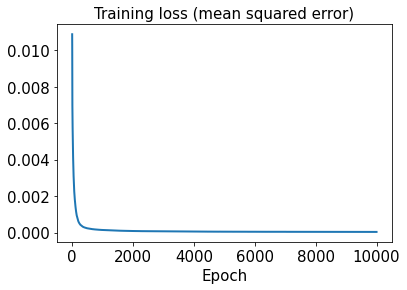

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

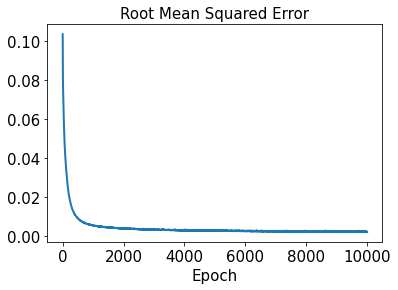

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

19/19 [==============================] - 0s 1ms/step - loss: 3.3162e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0023236482


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.03150567


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0018870522, 0.004931732, 0.0020278203, 0.0023621274, 0.0007611845, 0.0021934393, 0.0031157583, 0.002683993, 0.0013012425, 0.0036137458, 0.0011193688, 0.0017545976, 0.0031132717, 0.012183593, 0.002277027, 0.0014350503, 0.0007365467, 0.0030944315, 0.00095041434, 0.002915374, 0.0010338143, 0.004098921, 0.0006518413, 0.002922345, 0.0017623506, 0.002055681, 0.00335367, 0.00073320256, 0.0007837157, 0.0027826822, 0.0036328651, 0.0054664253, 0.0040062396, 0.0013032805, 0.0011293507, 0.0055068913, 0.0016874972, 0.0029849755, 0.0018581325, 0.00055433234, 0.0034637447, 0.0022067437, 0.0023882997, 0.003288229, 0.0007176401, 0.0038266196, 0.0009882783, 0.0012616932, 0.003078922, 0.0023804877, 0.002654432, 0.0022395803, 0.001181344, 0.0012157756, 0.0017256327, 0.003705327, 0.0021143365, 0.0024682642, 0.00071254064, 0.0025452455, 0.0029179074, 0.0016819555, 0.000578584, 0.00206154, 0.0021554434, 0.0014215725, 0.0014523315, 0.0011048337, 0.0017205648, 0.0014660559, 0.0026119554, 0.0029589466, 0.004

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.014600815, 0.01072793, 0.0057831537, 0.039565653, 0.015707977, 0.008609786, 0.20650424, 0.015819076, 0.005865957, 0.22583222, 0.027914716, 0.005134226, 0.013421102, 0.00618917, 0.023127107, 0.013222514, 0.007208462, 0.014163815, 0.026527531, 0.006755436, 0.020415338, 0.023718767, 0.034006048, 0.009711149, 0.09970071, 0.014889791, 0.116497666, 0.008367226, 0.0036115956, 0.0076939245, 0.00393685, 0.024755433, 0.029746935, 0.007950497, 0.06261747, 0.19181888, 0.010243644, 0.010848125, 0.03160685, 0.0043608407, 0.2250918, 0.0046248394, 0.006564206, 0.002565561, 0.05533001, 0.011209698, 0.004005825, 0.008234413, 0.014680401, 0.0047070095, 0.0038137748, 0.0122793205, 0.005666158, 0.006470363, 0.016959412, 0.0132245645, 0.015680617, 0.04348047, 0.028677868, 0.005100458, 0.05583775, 0.013040199, 0.0039661326, 0.0155617725, 0.010645325, 0.009682986]


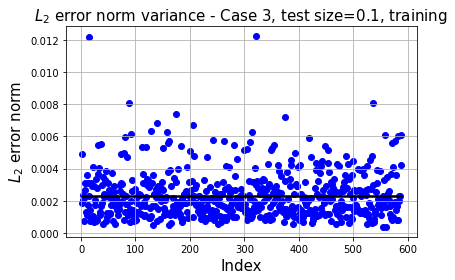

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 3, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

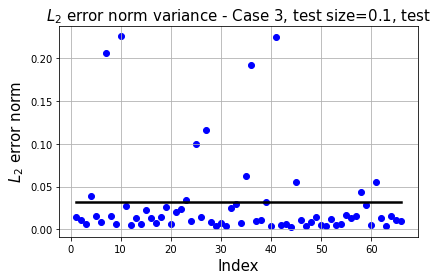

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 3, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

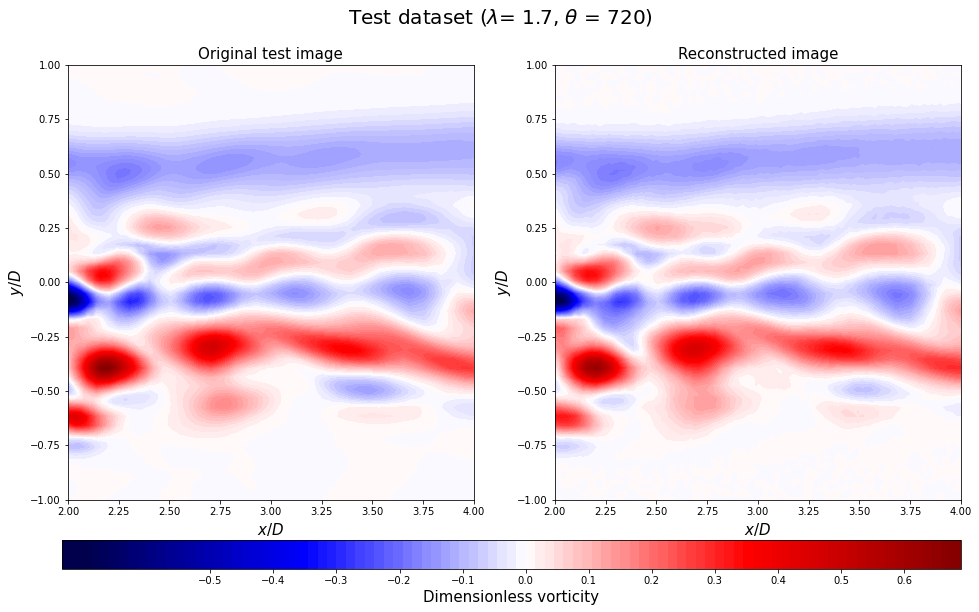

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

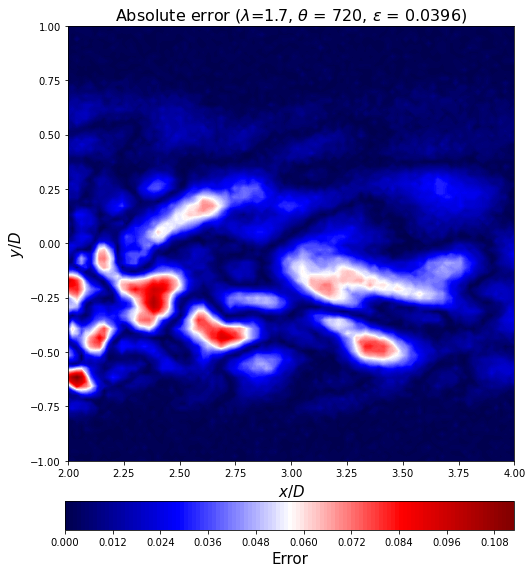

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()